# Libraries

In [65]:
# Numerical
import numpy as np
import pandas as pd
# Viz
import matplotlib.pyplot as plt
import seaborn as sns
# Viz Settings
sns.set_style(style='darkgrid')
# Importing Files
import glob

# Importing Data

## Data Explaination
- No : experiment number
- material : wax
- feed_rate : relative velocity of the cutting tool along the workpiece (mm/s)
- clamp_pressure : pressure used to hold the workpiece in the vise (bar)

Outputs (predictions)

- tool_condition : label for unworn and worn tools
- machining_completed : indicator for if machining was completed without the workpiece moving out of the pneumatic vise
- passed_visual_inspection: indicator for if the workpiece passed visual inspection, only available for experiments where machining was completed


**Time series data was collected from 18 experiments with a sampling rate of 100 ms** and are separately reported in files experiment_01.csv to experiment_18.csv. Each file has measurements from the 4 motors in the CNC (X, Y, Z axes and spindle). These CNC measurements can be used in two ways:

(1) Taking every CNC measurement as an independent observation where the operation being performed is given in the Machining_Process column. Active machining operations are labeled as "Layer 1 Up", "Layer 1 Down", "Layer 2 Up", "Layer 2 Down", "Layer 3 Up", and "Layer 3 Down". 

(2) Taking each one of the 18 experiments (the entire time series) as an observation for time series classification


The features available in the machining datasets are:


- X1_ActualPosition: actual x position of part (mm)
- X1_ActualVelocity: actual x velocity of part (mm/s)
- X1_ActualAcceleration: actual x acceleration of part (mm/s/s)
- X1_CommandPosition: reference x position of part (mm)
- X1_CommandVelocity: reference x velocity of part (mm/s)
- X1_CommandAcceleration: reference x acceleration of part (mm/s/s)
- X1_CurrentFeedback: current (A)
- X1_DCBusVoltage: voltage (V)
- X1_OutputCurrent: current (A)
- X1_OutputVoltage: voltage (V)
- X1_OutputPower: power (kW)


- Y1_ActualPosition: actual y position of part (mm)
- Y1_ActualVelocity: actual y velocity of part (mm/s)
- Y1_ActualAcceleration: actual y acceleration of part (mm/s/s)
- Y1_CommandPosition: reference y position of part (mm)
- Y1_CommandVelocity: reference y velocity of part (mm/s)
- Y1_CommandAcceleration: reference y acceleration of part (mm/s/s)
- Y1_CurrentFeedback: current (A)
- Y1_DCBusVoltage: voltage (V)
- Y1_OutputCurrent: current (A)
- Y1_OutputVoltage: voltage (V)
- Y1_OutputPower: power (kW)


- Z1_ActualPosition: actual z position of part (mm)
- Z1_ActualVelocity: actual z velocity of part (mm/s)
- Z1_ActualAcceleration: actual z acceleration of part (mm/s/s)
- Z1_CommandPosition: reference z position of part (mm)
- Z1_CommandVelocity: reference z velocity of part (mm/s)
- Z1_CommandAcceleration: reference z acceleration of part (mm/s/s)
- Z1_CurrentFeedback: current (A)
- Z1_DCBusVoltage: voltage (V)
- Z1_OutputCurrent: current (A)
- Z1_OutputVoltage: voltage (V)


- S1_ActualPosition: actual position of spindle (mm)
- S1_ActualVelocity: actual velocity of spindle (mm/s)
- S1_ActualAcceleration: actual acceleration of spindle (mm/s/s)
- S1_CommandPosition: reference position of spindle (mm)
- S1_CommandVelocity: reference velocity of spindle (mm/s)
- S1_CommandAcceleration: reference acceleration of spindle (mm/s/s)
- S1_CurrentFeedback: current (A)
- S1_DCBusVoltage: voltage (V)
- S1_OutputCurrent: current (A)
- S1_OutputVoltage: voltage (V)
- S1_OutputPower: current (A)
- S1_SystemInertia: torque inertia (kg*m^2)


- M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
- M1_sequence_number: line of G-code being executed
- M1_CURRENT_FEEDRATE: instantaneous feed rate of spindle

- Machining_Process: the current machining stage being performed. Includes preparation, tracing up  and down the "S" curve involving different layers, and repositioning of the spindle as it moves through the air to a certain starting point

Additional Notes:
- Some variables will not accurately reflect the operation of the CNC machine. This can usually be detected by when M1_CURRENT_FEEDRATE reads 50, when X1 ActualPosition reads 198, or when M1_CURRENT_PROGRAM_NUMBER does not read 0. The source of these errors has not been identified.

## CNC Data

In [66]:
# List of Data Files & Locations
path = r'F:\Work - Detroit Diesel\CNC_Machining_Dataset'
filenames = glob.glob(path + '/experiment*.csv')

# Making a list of DFs (1 DF per CSV file)
li = []
i = 1
for file in filenames:
    dfs = pd.read_csv(file,index_col=None,header=0)                             # Making DF for each dataset
    dfs['exp_no'] = i                                                           # Identifying the exp number
    dfs.insert(loc=0,column='Time(ms)',value=dfs.index*100)
    i += 1                                                                      # Iterating through exp numbers
    li.append(dfs)                                                              # Appending the DF to the outside list

# Concatendating all individual DFs together
## If headers are the same, then each new item is concatenated to the end
df = pd.concat(li,ignore_index=True)

In [67]:
df.head()

Time(ms)  X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0         0              198.0                0.0                   0.00   
1       100              198.0              -10.8                -350.00   
2       200              196.0              -17.8                  -6.25   
3       300              194.0              -18.0                   0.00   
4       400              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  ...  \
0                0.18           0.0207             329.0  ...   
1              -10.90           0.1860             328.0  ...   
2               -8.59           0.1400             328.0  ...   
3               -6.11           0.1300             327.0  ...   
4               -5.70           0.1140             328.0  ...   

   S1_DCBusVoltage  S1_OutputCurrent  S1_OutputVoltage  S1_OutputPower  \
0     2.740000e-19             329.0               0.0    6.960000e-07   
1     2.740000e-19             328.0               0.0   -5.270000e-07   
2     2.740000e-19             328.0               0.0    9.100000e-07   
3     2.740000e-19             328.0               0.0    1.070000e-06   
4     2.740000e-19             328.0               0.0    1.960000e-06   

   S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  M1_sequence_number  \
0              12.0                        1.0                 0.0   
1              12.0                        1.0                 4.0   
2              12.0                        1.0                 7.0   
3              12.0                        1.0                 7.0   
4              12.0                        1.0                 7.0   

   M1_CURRENT_FEEDRATE  Machining_Process  exp_no  
0                 50.0           Starting       1  
1                 50.0               Prep       1  
2                 50.0               Prep       1  
3                 50.0               Prep       1  
4                 50.0               Prep       1  

[5 rows x 50 columns]

## Importing Experimental Results Data

In [68]:
exp_result = pd.read_csv(r'F:\Work - Detroit Diesel\CNC_Machining_Dataset\train.csv')

In [69]:
exp_result

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0    1      wax         6             4.0         unworn                 yes   
1    2      wax        20             4.0         unworn                 yes   
2    3      wax         6             3.0         unworn                 yes   
3    4      wax         6             2.5         unworn                  no   
4    5      wax        20             3.0         unworn                  no   
5    6      wax         6             4.0           worn                 yes   
6    7      wax        20             4.0           worn                  no   
7    8      wax        20             4.0           worn                 yes   
8    9      wax        15             4.0           worn                 yes   
9   10      wax        12             4.0           worn                 yes   
10  11      wax         3             4.0         unworn                 yes   
11  12      wax         3             3.0         unworn                 yes   
12  13      wax         3             4.0           worn                 yes   
13  14      wax         3             3.0           worn                 yes   
14  15      wax         6             3.0           worn                 yes   
15  16      wax        20             3.0           worn                  no   
16  17      wax         3             2.5         unworn                 yes   
17  18      wax         3             2.5           worn                 yes   

   passed_visual_inspection  
0                       yes  
1                       yes  
2                       yes  
3                       NaN  
4                       NaN  
5                        no  
6                       NaN  
7                        no  
8                        no  
9                        no  
10                      yes  
11                      yes  
12                      yes  
13                      yes  
14                      yes  
15                      NaN  
16                      yes  
17                      yes

In [70]:
# Cleaning Exp Data
exp_result['passed_visual_inspection'].fillna('no',inplace=True)

In [71]:
exp_result.head()

No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0   1      wax         6             4.0         unworn                 yes   
1   2      wax        20             4.0         unworn                 yes   
2   3      wax         6             3.0         unworn                 yes   
3   4      wax         6             2.5         unworn                  no   
4   5      wax        20             3.0         unworn                  no   

  passed_visual_inspection  
0                      yes  
1                      yes  
2                      yes  
3                       no  
4                       no

## `JOIN` Exp Results & CNC Data

In [72]:
df_final = df.merge(exp_result,right_on='No',left_on='exp_no',how='left')

In [73]:
df_final[df_final['exp_no']==1]

Time(ms)  X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0            0              198.0              0.000                   0.00   
1          100              198.0            -10.800                -350.00   
2          200              196.0            -17.800                  -6.25   
3          300              194.0            -18.000                   0.00   
4          400              193.0            -17.900                 -18.80   
...        ...                ...                ...                    ...   
1050    105000              141.0              0.175                  87.50   
1051    105100              141.0             -0.150                 -87.50   
1052    105200              141.0             -0.175                 -87.50   
1053    105300              141.0              0.150                  87.50   
1054    105400              141.0              0.175                  93.70   

      X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0                  198.0                 0.0                0.000000   
1                  198.0               -13.6             -358.000000   
2                  196.0               -17.9               -0.000095   
3                  194.0               -17.9               -0.000095   
4                  192.0               -17.9                0.000095   
...                  ...                 ...                     ...   
1050               141.0                 0.0                0.000000   
1051               141.0                 0.0                0.000000   
1052               141.0                 0.0                0.000000   
1053               141.0                 0.0                0.000000   
1054               141.0                 0.0                0.000000   

      X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  ...  \
0                   0.18           0.0207             329.0  ...   
1                 -10.90           0.1860             328.0  ...   
2                  -8.59           0.1400             328.0  ...   
3                  -6.11           0.1300             327.0  ...   
4                  -5.70           0.1140             328.0  ...   
...                  ...              ...               ...  ...   
1050               -2.84           0.0522             325.0  ...   
1051               -1.85           0.0522             325.0  ...   
1052               -2.20           0.0527             325.0  ...   
1053               -4.02           0.0502             326.0  ...   
1054               -4.23           0.0547             329.0  ...   

      M1_CURRENT_FEEDRATE  Machining_Process  exp_no  No  material  feedrate  \
0                    50.0           Starting       1   1       wax         6   
1                    50.0               Prep       1   1       wax         6   
2                    50.0               Prep       1   1       wax         6   
3                    50.0               Prep       1   1       wax         6   
4                    50.0               Prep       1   1       wax         6   
...                   ...                ...     ...  ..       ...       ...   
1050                 50.0                end       1   1       wax         6   
1051                 50.0                end       1   1       wax         6   
1052                 50.0                end       1   1       wax         6   
1053                 50.0                end       1   1       wax         6   
1054                 50.0                end       1   1       wax         6   

      clamp_pressure  tool_condition  machining_finalized  \
0                4.0          unworn                  yes   
1                4.0          unworn                  yes   
2                4.0          unworn                  yes   
3                4.0          unworn                  yes   
4                4.0          unworn                  yes   
...              ...             ...            

# Exploratory Data Analysis

In [74]:
# Remove 'No' because we do not need two columns that say the same thing
df_final.drop('No',axis=1,inplace=True)
df_final.head()

Time(ms)  X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0         0              198.0                0.0                   0.00   
1       100              198.0              -10.8                -350.00   
2       200              196.0              -17.8                  -6.25   
3       300              194.0              -18.0                   0.00   
4       400              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  ...  \
0                0.18           0.0207             329.0  ...   
1              -10.90           0.1860             328.0  ...   
2               -8.59           0.1400             328.0  ...   
3               -6.11           0.1300             327.0  ...   
4               -5.70           0.1140             328.0  ...   

   M1_sequence_number  M1_CURRENT_FEEDRATE  Machining_Process  exp_no  \
0                 0.0                 50.0           Starting       1   
1                 4.0                 50.0               Prep       1   
2                 7.0                 50.0               Prep       1   
3                 7.0                 50.0               Prep       1   
4                 7.0                 50.0               Prep       1   

   material  feedrate  clamp_pressure  tool_condition  machining_finalized  \
0       wax         6             4.0          unworn                  yes   
1       wax         6             4.0          unworn                  yes   
2       wax         6             4.0          unworn                  yes   
3       wax         6             4.0          unworn                  yes   
4       wax         6             4.0          unworn                  yes   

   passed_visual_inspection  
0                       yes  
1                       yes  
2                       yes  
3                       yes  
4                       yes  

[5 rows x 56 columns]

In [75]:
df_final.describe()

Time(ms)  X1_ActualPosition  X1_ActualVelocity  \
count   25286.000000       25286.000000       25286.000000   
mean    87424.460176         159.052045          -0.288657   
std     61775.022212          19.330873           5.658260   
min         0.000000         141.000000         -20.400000   
25%     35100.000000         145.000000          -2.050000   
50%     76100.000000         153.000000           0.000000   
75%    131100.000000         162.000000           0.200000   
max    233100.000000         198.000000          50.700000   

       X1_ActualAcceleration  X1_CommandPosition  X1_CommandVelocity  \
count           25286.000000        25286.000000        25286.000000   
mean                0.094264          159.050700           -0.283076   
std                93.877623           19.331144            5.664309   
min             -1280.000000          141.000000          -20.000000   
25%               -31.300000          145.000000           -2.050000   
50%                 0.000000          153.000000            0.000000   
75%                25.000000          162.000000            0.000000   
max              1440.000000          198.000000           50.000000   

       X1_CommandAcceleration  X1_CurrentFeedback  X1_DCBusVoltage  \
count            25286.000000        25286.000000     2.528600e+04   
mean                 0.253215           -0.469714     6.603073e-02   
std                 72.594951            4.220750     3.700384e-02   
min              -1000.000000          -23.400000     2.780000e-19   
25%                  0.000000           -3.930000     4.150000e-02   
50%                  0.000000           -0.666000     6.680000e-02   
75%                  0.000000            3.140000     9.130000e-02   
max               1000.000000           27.100000     3.800000e-01   

       X1_OutputCurrent  ...  S1_OutputCurrent  S1_OutputVoltage  \
count      25286.000000  ...      25286.000000      25286.000000   
mean         326.945859  ...        322.784505         85.479195   
std            1.459937  ...          4.293571         52.531863   
min          320.000000  ...        290.000000          0.000000   
25%          326.000000  ...        320.000000          0.000000   
50%          327.000000  ...        322.000000        117.000000   
75%          327.000000  ...        327.000000        119.000000   
max          331.000000  ...        332.000000        130.000000   

       S1_OutputPower  S1_SystemInertia  M1_CURRENT_PROGRAM_NUMBER  \
count    25286.000000           25286.0               25286.000000   
mean         0.127405              12.0                   1.003441   
std          0.080753               0.0                   0.349055   
min         -0.002960              12.0                   0.000000   
25%          0.000005              12.0                   1.000000   
50%          0.164000              12.0                   1.000000   
75%          0.183000              12.0                   1.000000   
max          0.569000              12.0                   4.000000   

       M1_sequence_number  M1_CURRENT_FEEDRATE        exp_no      feedrate  \
count        25286.000000         25286.000000  25286.000000  25286.000000   
mean            47.345013            16.542039     10.738235      7.123942   
std             43.826214            19.620219      5.213285      6.167036   
min              0.000000             3.000000      1.000000      3.000000   
25%              2.000000             3.000000      6.000000      3.000000   
50%             39.000000             6.000000     12.000000      3.000000   
75%             85.000000            20.000000     15.000000      6.000000   
max            135.000000            50.000000     18.000000     20.000000   

       clamp_pressure  
count    25286.000000  
mean         3.368168  
std          0.615639  
min          2.500000  
25%          3.000000  
50%          3.000000  
75%          4.000000  
max          4.000000  

[8 rows x

In [76]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25286 entries, 0 to 25285
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time(ms)                   25286 non-null  int64  
 1   X1_ActualPosition          25286 non-null  float64
 2   X1_ActualVelocity          25286 non-null  float64
 3   X1_ActualAcceleration      25286 non-null  float64
 4   X1_CommandPosition         25286 non-null  float64
 5   X1_CommandVelocity         25286 non-null  float64
 6   X1_CommandAcceleration     25286 non-null  float64
 7   X1_CurrentFeedback         25286 non-null  float64
 8   X1_DCBusVoltage            25286 non-null  float64
 9   X1_OutputCurrent           25286 non-null  float64
 10  X1_OutputVoltage           25286 non-null  float64
 11  X1_OutputPower             25286 non-null  float64
 12  Y1_ActualPosition          25286 non-null  float64
 13  Y1_ActualVelocity          25286 non-null  flo

In [77]:
df_final['Machining_Process'].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

<AxesSubplot:title={'center':'Machine Process Identification Count'}, xlabel='Machining_Process', ylabel='count'>

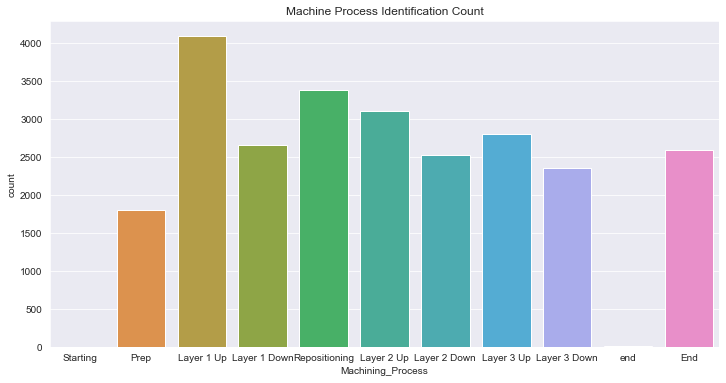

In [78]:
plt.figure(figsize=(12,6))
plt.title('Machine Process Identification Count')
sns.countplot(data=df_final,
              x='Machining_Process'
             )

In [79]:
df_final['Machining_Process'].value_counts()

Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2585
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1795
end                 8
Starting            1
Name: Machining_Process, dtype: int64

### Note for Data Cleansing:
Need to adjust the 'end' to read 'End'. Also need to change the 'Start' to 'Prep'

## Data Cleaning

In [80]:
df_final['Machining_Process'].replace(to_replace=('end','Starting'),value=('End','Prep'),inplace=True)

In [81]:
df_final['Machining_Process'].value_counts()

Layer 1 Up       4085
Repositioning    3377
Layer 2 Up       3104
Layer 3 Up       2794
Layer 1 Down     2655
End              2593
Layer 2 Down     2528
Layer 3 Down     2354
Prep             1796
Name: Machining_Process, dtype: int64

# Back to EDA

<AxesSubplot:title={'center':'Worn/Unworn Count'}, xlabel='tool_condition', ylabel='count'>

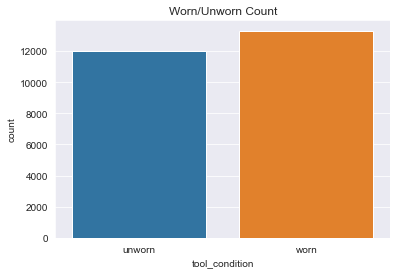

In [82]:
plt.title('Worn/Unworn Count')
sns.countplot(data=df_final,
              x='tool_condition'
             )

<AxesSubplot:title={'center':'Machining Finished Count'}, xlabel='machining_finalized', ylabel='count'>

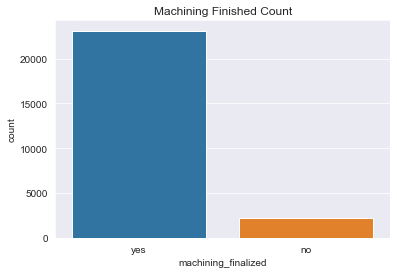

In [83]:
plt.title('Machining Finished Count')
sns.countplot(data=df_final,x='machining_finalized')

## EDA - Trying to Identify Impact of Inaccurate Data Capture
Note per person running experiment: There are instances where the CNC machines values that are read are not accurate when:
- M1_CURRENT_FEEDRATE reads 50
- X1_ActualPosition reads 198
- M1_CURRENT_PROGRAM_NUMBER does not read 0.

### Impact of M1_CURRENT_FEEDRATE Reading 50

<AxesSubplot:title={'center':'M1_CURRENT_FEEDRATE Count'}, xlabel='M1_CURRENT_FEEDRATE', ylabel='count'>

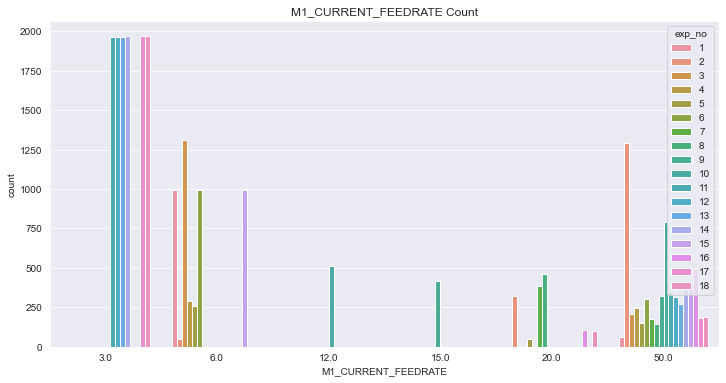

In [84]:
plt.figure(figsize=(12,6))
plt.title('M1_CURRENT_FEEDRATE Count')
sns.countplot(data=df_final,x='M1_CURRENT_FEEDRATE',hue='exp_no')

In [85]:
df_final[df_final['M1_CURRENT_FEEDRATE']==50]

Time(ms)  X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0             0              198.0              0.000                   0.00   
1           100              198.0            -10.800                -350.00   
2           200              196.0            -17.800                  -6.25   
3           300              194.0            -18.000                   0.00   
4           400              193.0            -17.900                 -18.80   
...         ...                ...                ...                    ...   
25119    208600              141.0             -0.175                 -93.70   
25120    208700              141.0             -0.150                 -81.20   
25121    208800              141.0             -0.125                 -68.70   
25122    208900              141.0             -0.175                 -93.70   
25123    209000              141.0             -0.200                -100.00   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0                   198.0                 0.0                0.000000   
1                   198.0               -13.6             -358.000000   
2                   196.0               -17.9               -0.000095   
3                   194.0               -17.9               -0.000095   
4                   192.0               -17.9                0.000095   
...                   ...                 ...                     ...   
25119               141.0                 0.0                0.000000   
25120               141.0                 0.0                0.000000   
25121               141.0                 0.0                0.000000   
25122               141.0                 0.0                0.000000   
25123               141.0                 0.0                0.000000   

       X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  ...  \
0                   0.180           0.0207             329.0  ...   
1                 -10.900           0.1860             328.0  ...   
2                  -8.590           0.1400             328.0  ...   
3                  -6.110           0.1300             327.0  ...   
4                  -5.700           0.1140             328.0  ...   
...                   ...              ...               ...  ...   
25119              -1.450           0.0530             330.0  ...   
25120              -1.150           0.0551             330.0  ...   
25121              -2.790           0.0562             330.0  ...   
25122              -2.590           0.0534             330.0  ...   
25123               0.149           0.0592             330.0  ...   

       M1_sequence_number  M1_CURRENT_FEEDRATE  Machining_Process  exp_no  \
0                     0.0                 50.0               Prep       1   
1                     4.0                 50.0               Prep       1   
2                     7.0                 50.0               Prep       1   
3                     7.0                 50.0               Prep       1   
4                     7.0                 50.0               Prep       1   
...                   ...                  ...                ...     ...   
25119                 0.0                 50.0                End      18   
25120                 0.0                 50.0                End      18   
25121                 0.0                 50.0                End      18   
25122                 0.0                 50.0                End      18   
25123                 0.0                 50.0                End      18   

       material  feedrate  clamp_pressure  tool_condition  \
0           wax         6             4.0          unworn   
1           wax         6             4.0          unworn   
2           wax         6             4.0          unworn   
3           wax         6             4.0          unworn   
4           wax         6             4.0          unworn   
...         ...       ...             ...        

In [86]:
df_final[df_final['M1_CURRENT_FEEDRATE']==50]['Time(ms)'].count()

6253

### Impact of X1_ActualPosition Reading 198

<AxesSubplot:title={'center':'X1 ActualPosition Count'}, xlabel='X1_ActualPosition', ylabel='count'>

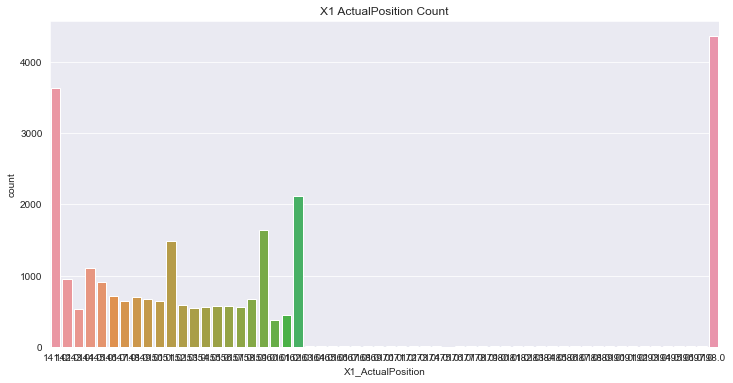

In [87]:
plt.figure(figsize=(12,6))
plt.title('X1 ActualPosition Count')
sns.countplot(data=df_final,x='X1_ActualPosition')

In [88]:
df_final[df_final['X1_ActualPosition']==198]['Time(ms)'].count()

4360

In [89]:
df_final[df_final['X1_ActualPosition']==198][['X1_ActualPosition','exp_no']]

X1_ActualPosition  exp_no
0                  198.0       1
1                  198.0       1
1055               198.0       2
1056               198.0       2
1057               198.0       2
...                  ...     ...
25057              198.0      18
25058              198.0      18
25059              198.0      18
25060              198.0      18
25061              198.0      18

[4360 rows x 2 columns]

In [90]:
df_final[(df_final['X1_ActualPosition']==198) & (df_final['M1_CURRENT_FEEDRATE']==50)]['Time(ms)'].count()

3182

In [91]:
df_final['Time(ms)'].count()

25286

<AxesSubplot:title={'center':'X1_Actual Position'}, xlabel='Time(ms)', ylabel='X1_ActualPosition'>

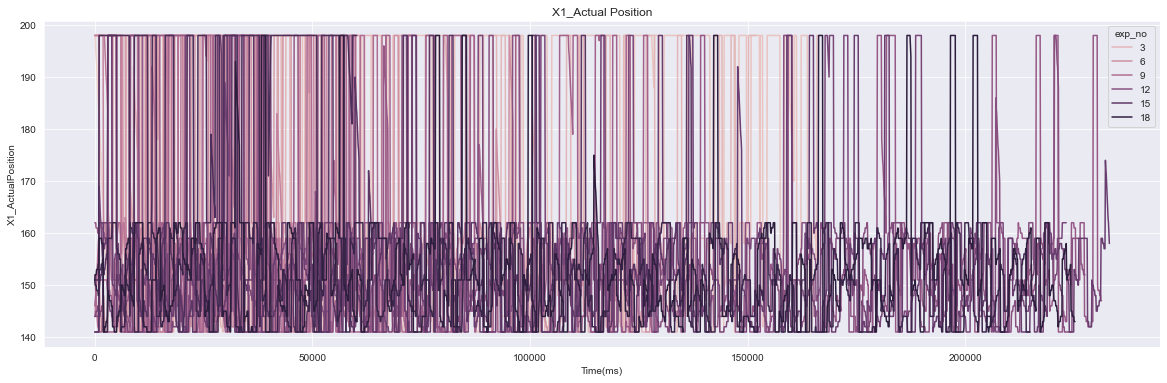

In [92]:
# Graphic Exp 1 Actual Position
plt.figure(figsize=(20,6))
plt.title('X1_Actual Position')
sns.lineplot(data=df_final,
             x='Time(ms)',
             y='X1_ActualPosition',
             hue='exp_no'
            )

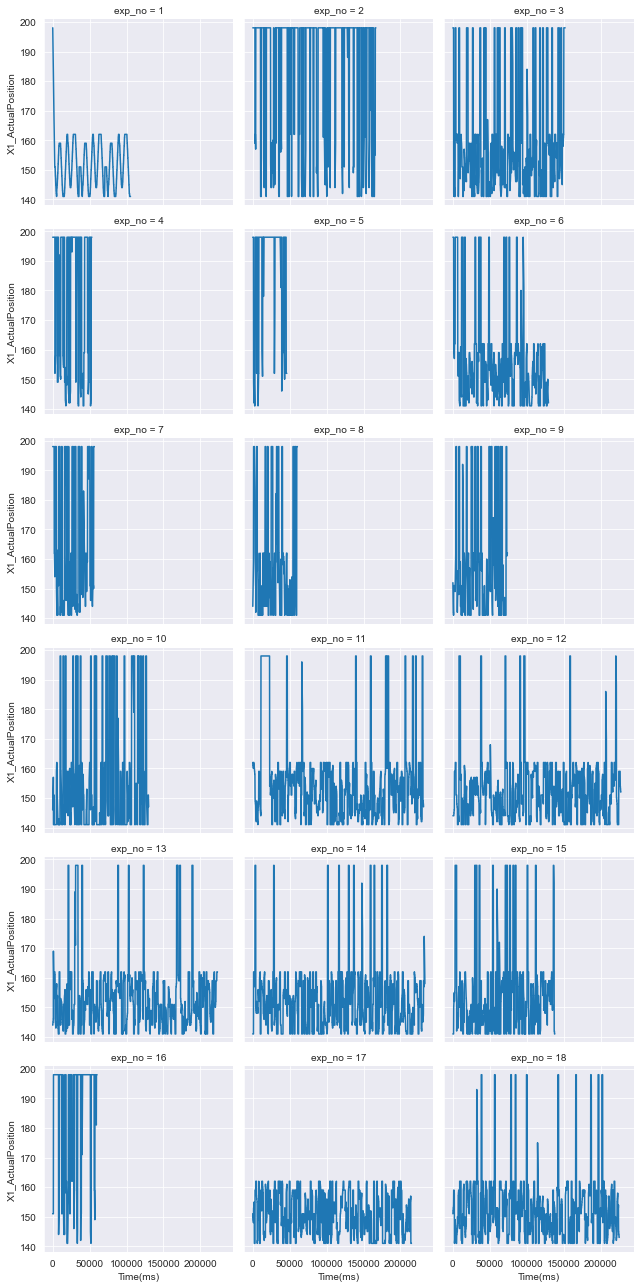

In [93]:
g = sns.FacetGrid(data=df_final,col='exp_no',col_wrap=3)
g.map(sns.lineplot,'Time(ms)','X1_ActualPosition')

#### Notes:
- During second attempt, remove all lines that read 198 for X1_ActualPosition

### Impact of M1_CURRENT_PROGRAM_NUMBER Not Reading 0

<AxesSubplot:title={'center':'M1_CURRENT_PROGRAM_NUMBER Count'}, xlabel='M1_CURRENT_PROGRAM_NUMBER', ylabel='count'>

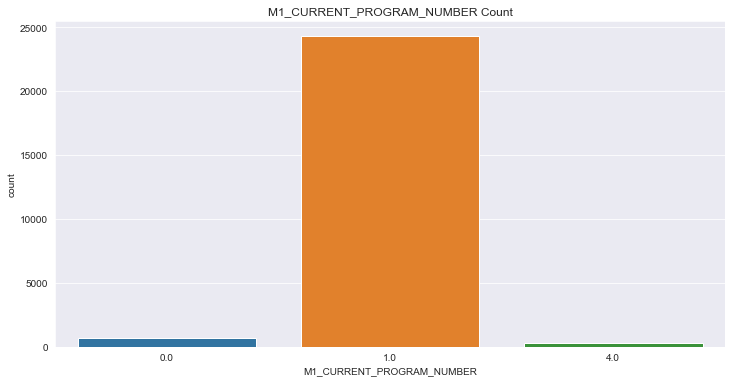

In [94]:
plt.figure(figsize=(12,6))
plt.title('M1_CURRENT_PROGRAM_NUMBER Count')
sns.countplot(data=df_final,x='M1_CURRENT_PROGRAM_NUMBER')

In [95]:
df_final[df_final['M1_CURRENT_PROGRAM_NUMBER']!=0]['Time(ms)'].count()

24581

In [96]:
df_final[(df_final['X1_ActualPosition']==198) & (df_final['M1_CURRENT_FEEDRATE']==50) & (df_final['M1_CURRENT_PROGRAM_NUMBER']!=0)]['Time(ms)'].count()

2517

#### Note:
- During second attempt, M1_CURRENT_PROGRAM_NUMBER column all together. Need to ask myself if this beneficial to keep.

### Parameters Over Time

In [97]:
df_final.columns[:]

Index(['Time(ms)', 'X1_ActualPosition', 'X1_ActualVelocity',
       'X1_ActualAcceleration', 'X1_CommandPosition', 'X1_CommandVelocity',
       'X1_CommandAcceleration', 'X1_CurrentFeedback', 'X1_DCBusVoltage',
       'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower',
       'Y1_ActualPosition', 'Y1_ActualVelocity', 'Y1_ActualAcceleration',
       'Y1_CommandPosition', 'Y1_CommandVelocity', 'Y1_CommandAcceleration',
       'Y1_CurrentFeedback', 'Y1_DCBusVoltage', 'Y1_OutputCurrent',
       'Y1_OutputVoltage', 'Y1_OutputPower', 'Z1_ActualPosition',
       'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandPosition',
       'Z1_CommandVelocity', 'Z1_CommandAcceleration', 'Z1_CurrentFeedback',
       'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage',
       'S1_ActualPosition', 'S1_ActualVelocity', 'S1_ActualAcceleration',
       'S1_CommandPosition', 'S1_CommandVelocity', 'S1_CommandAcceleration',
       'S1_CurrentFeedback', 'S1_DCBusVoltage', 'S1_OutputCurrent',
  

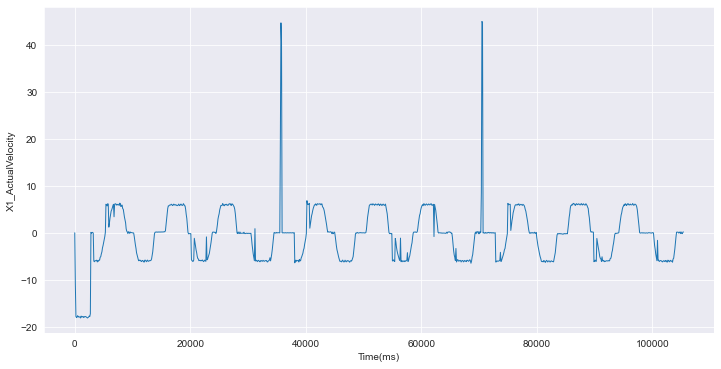

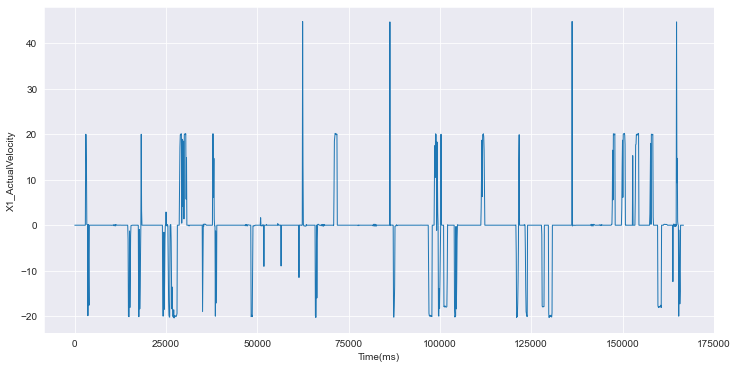

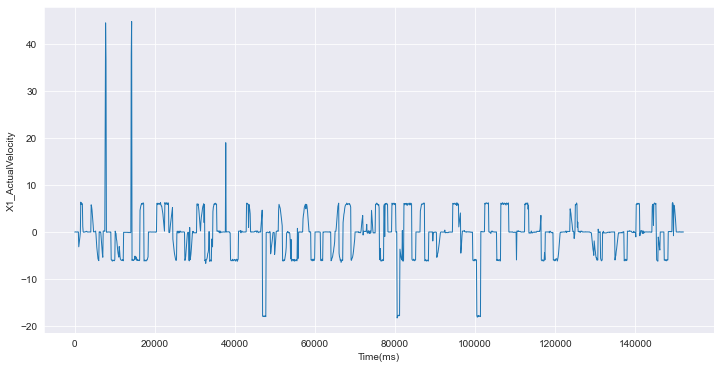

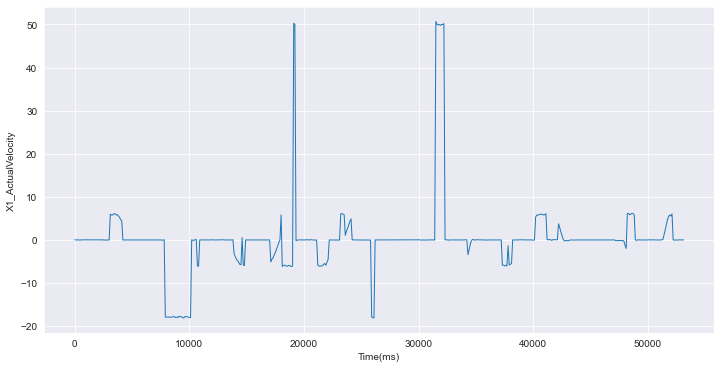

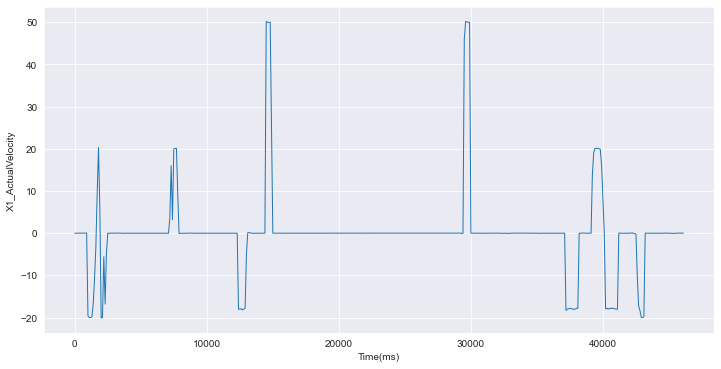

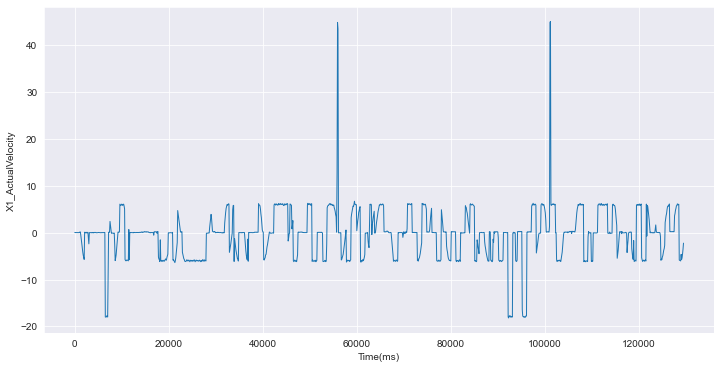

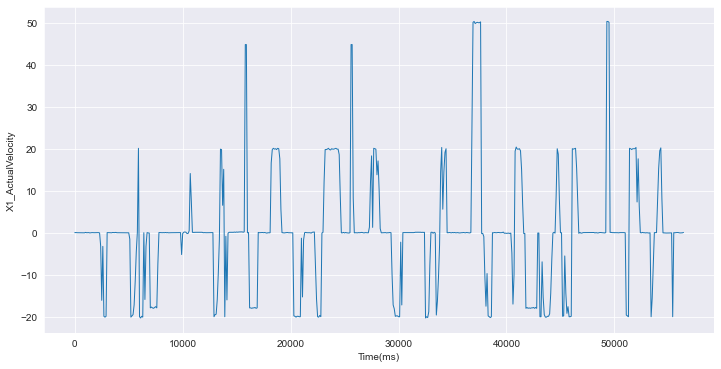

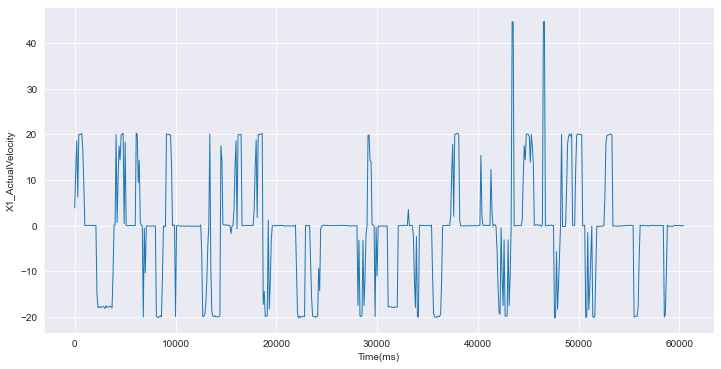

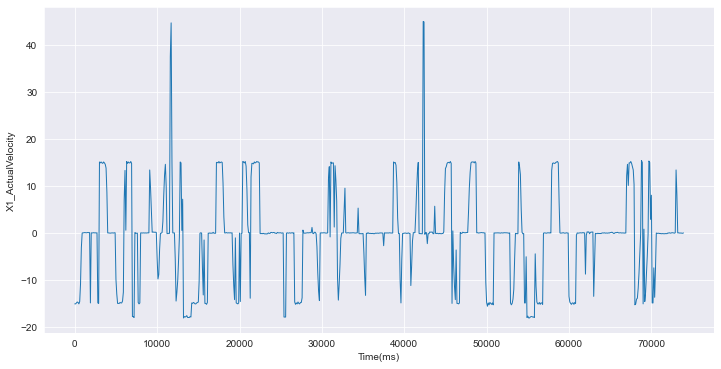

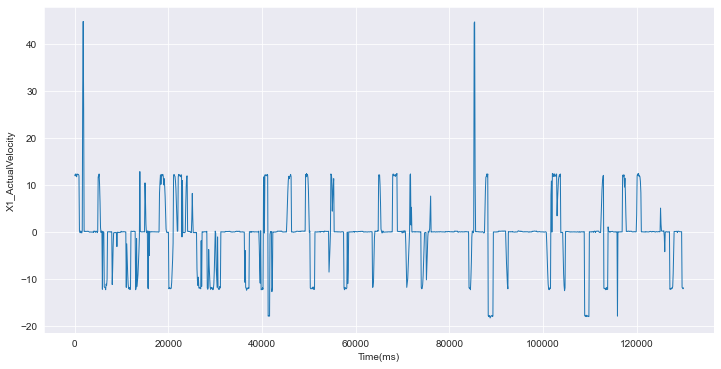

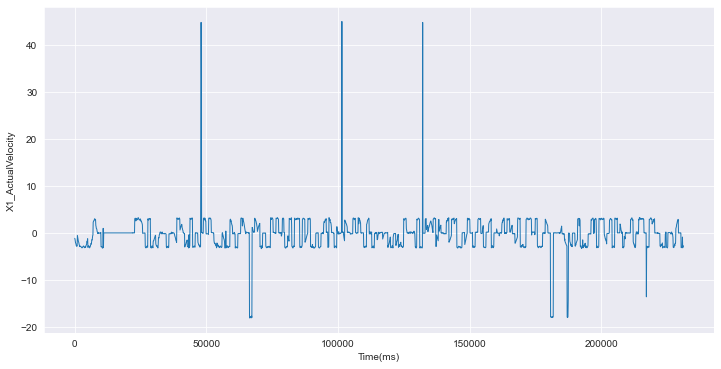

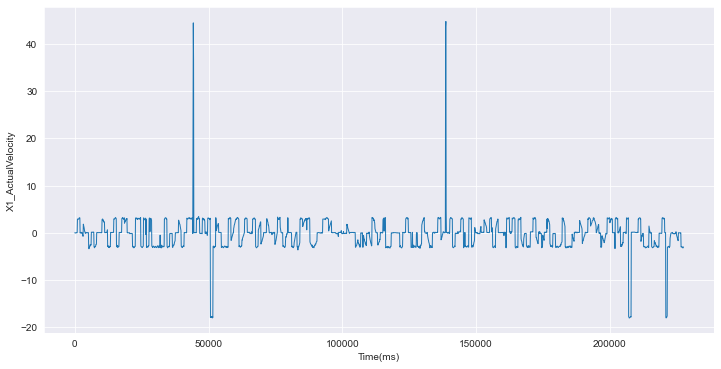

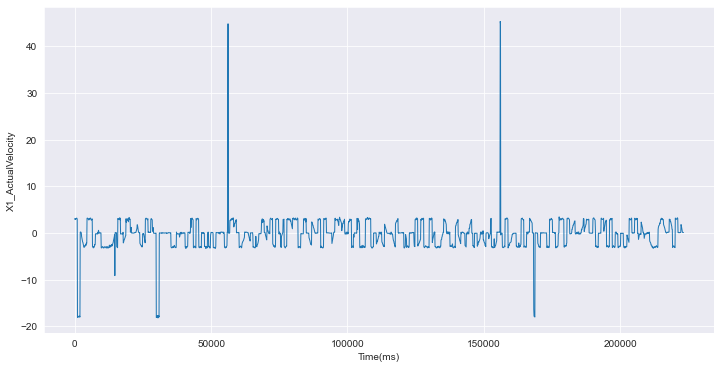

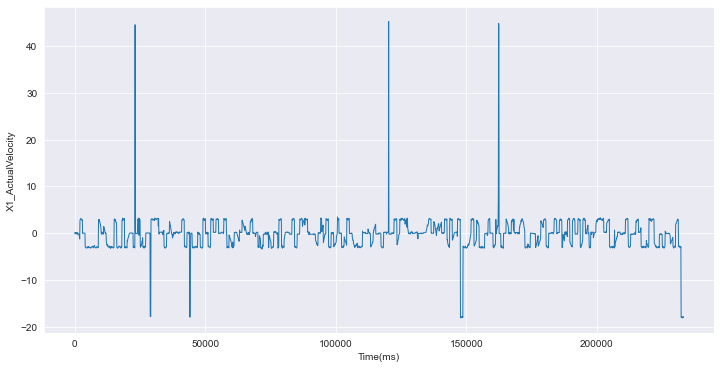

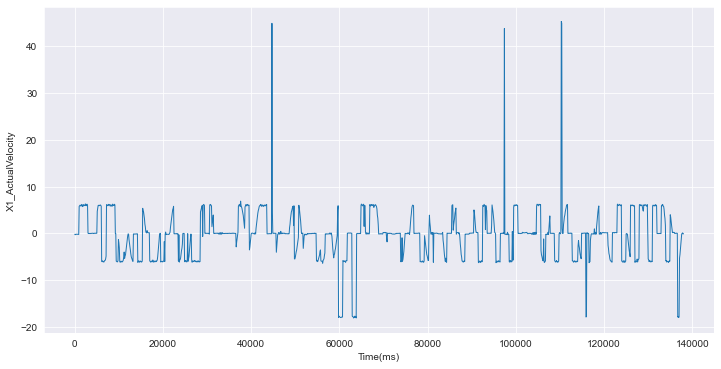

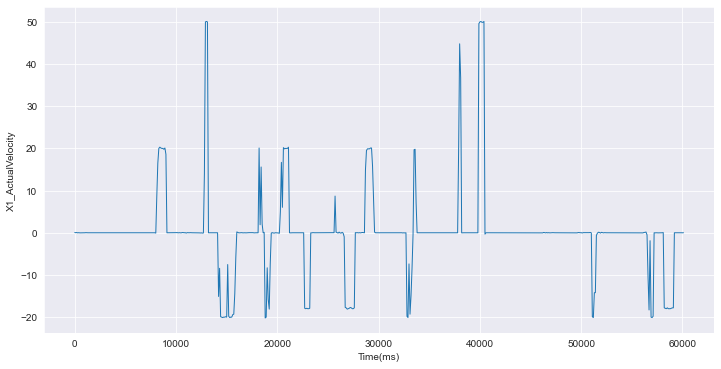

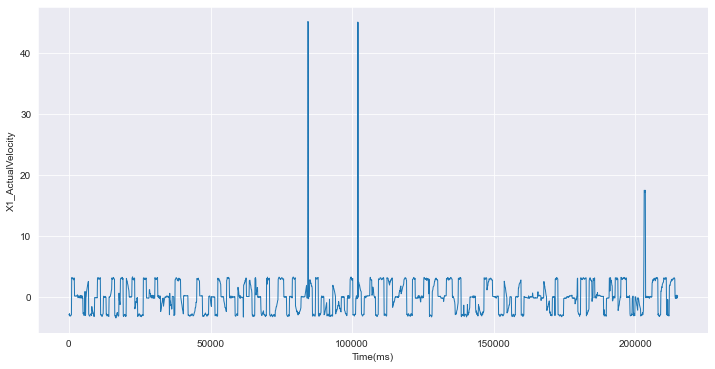

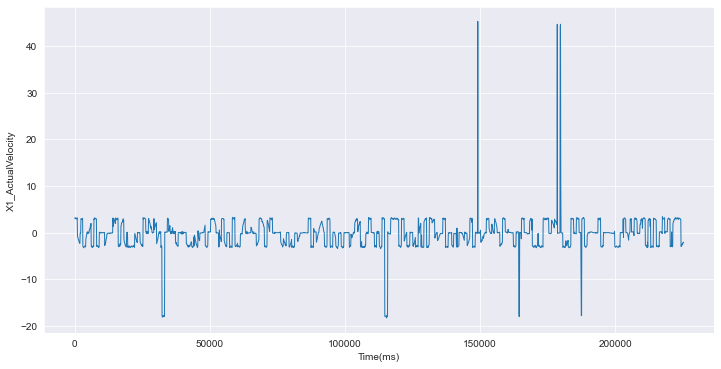

In [98]:
for i in range(1,19):
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df_final[df_final['exp_no']==i],x='Time(ms)',y='X1_ActualVelocity',estimator=None,lw=1)

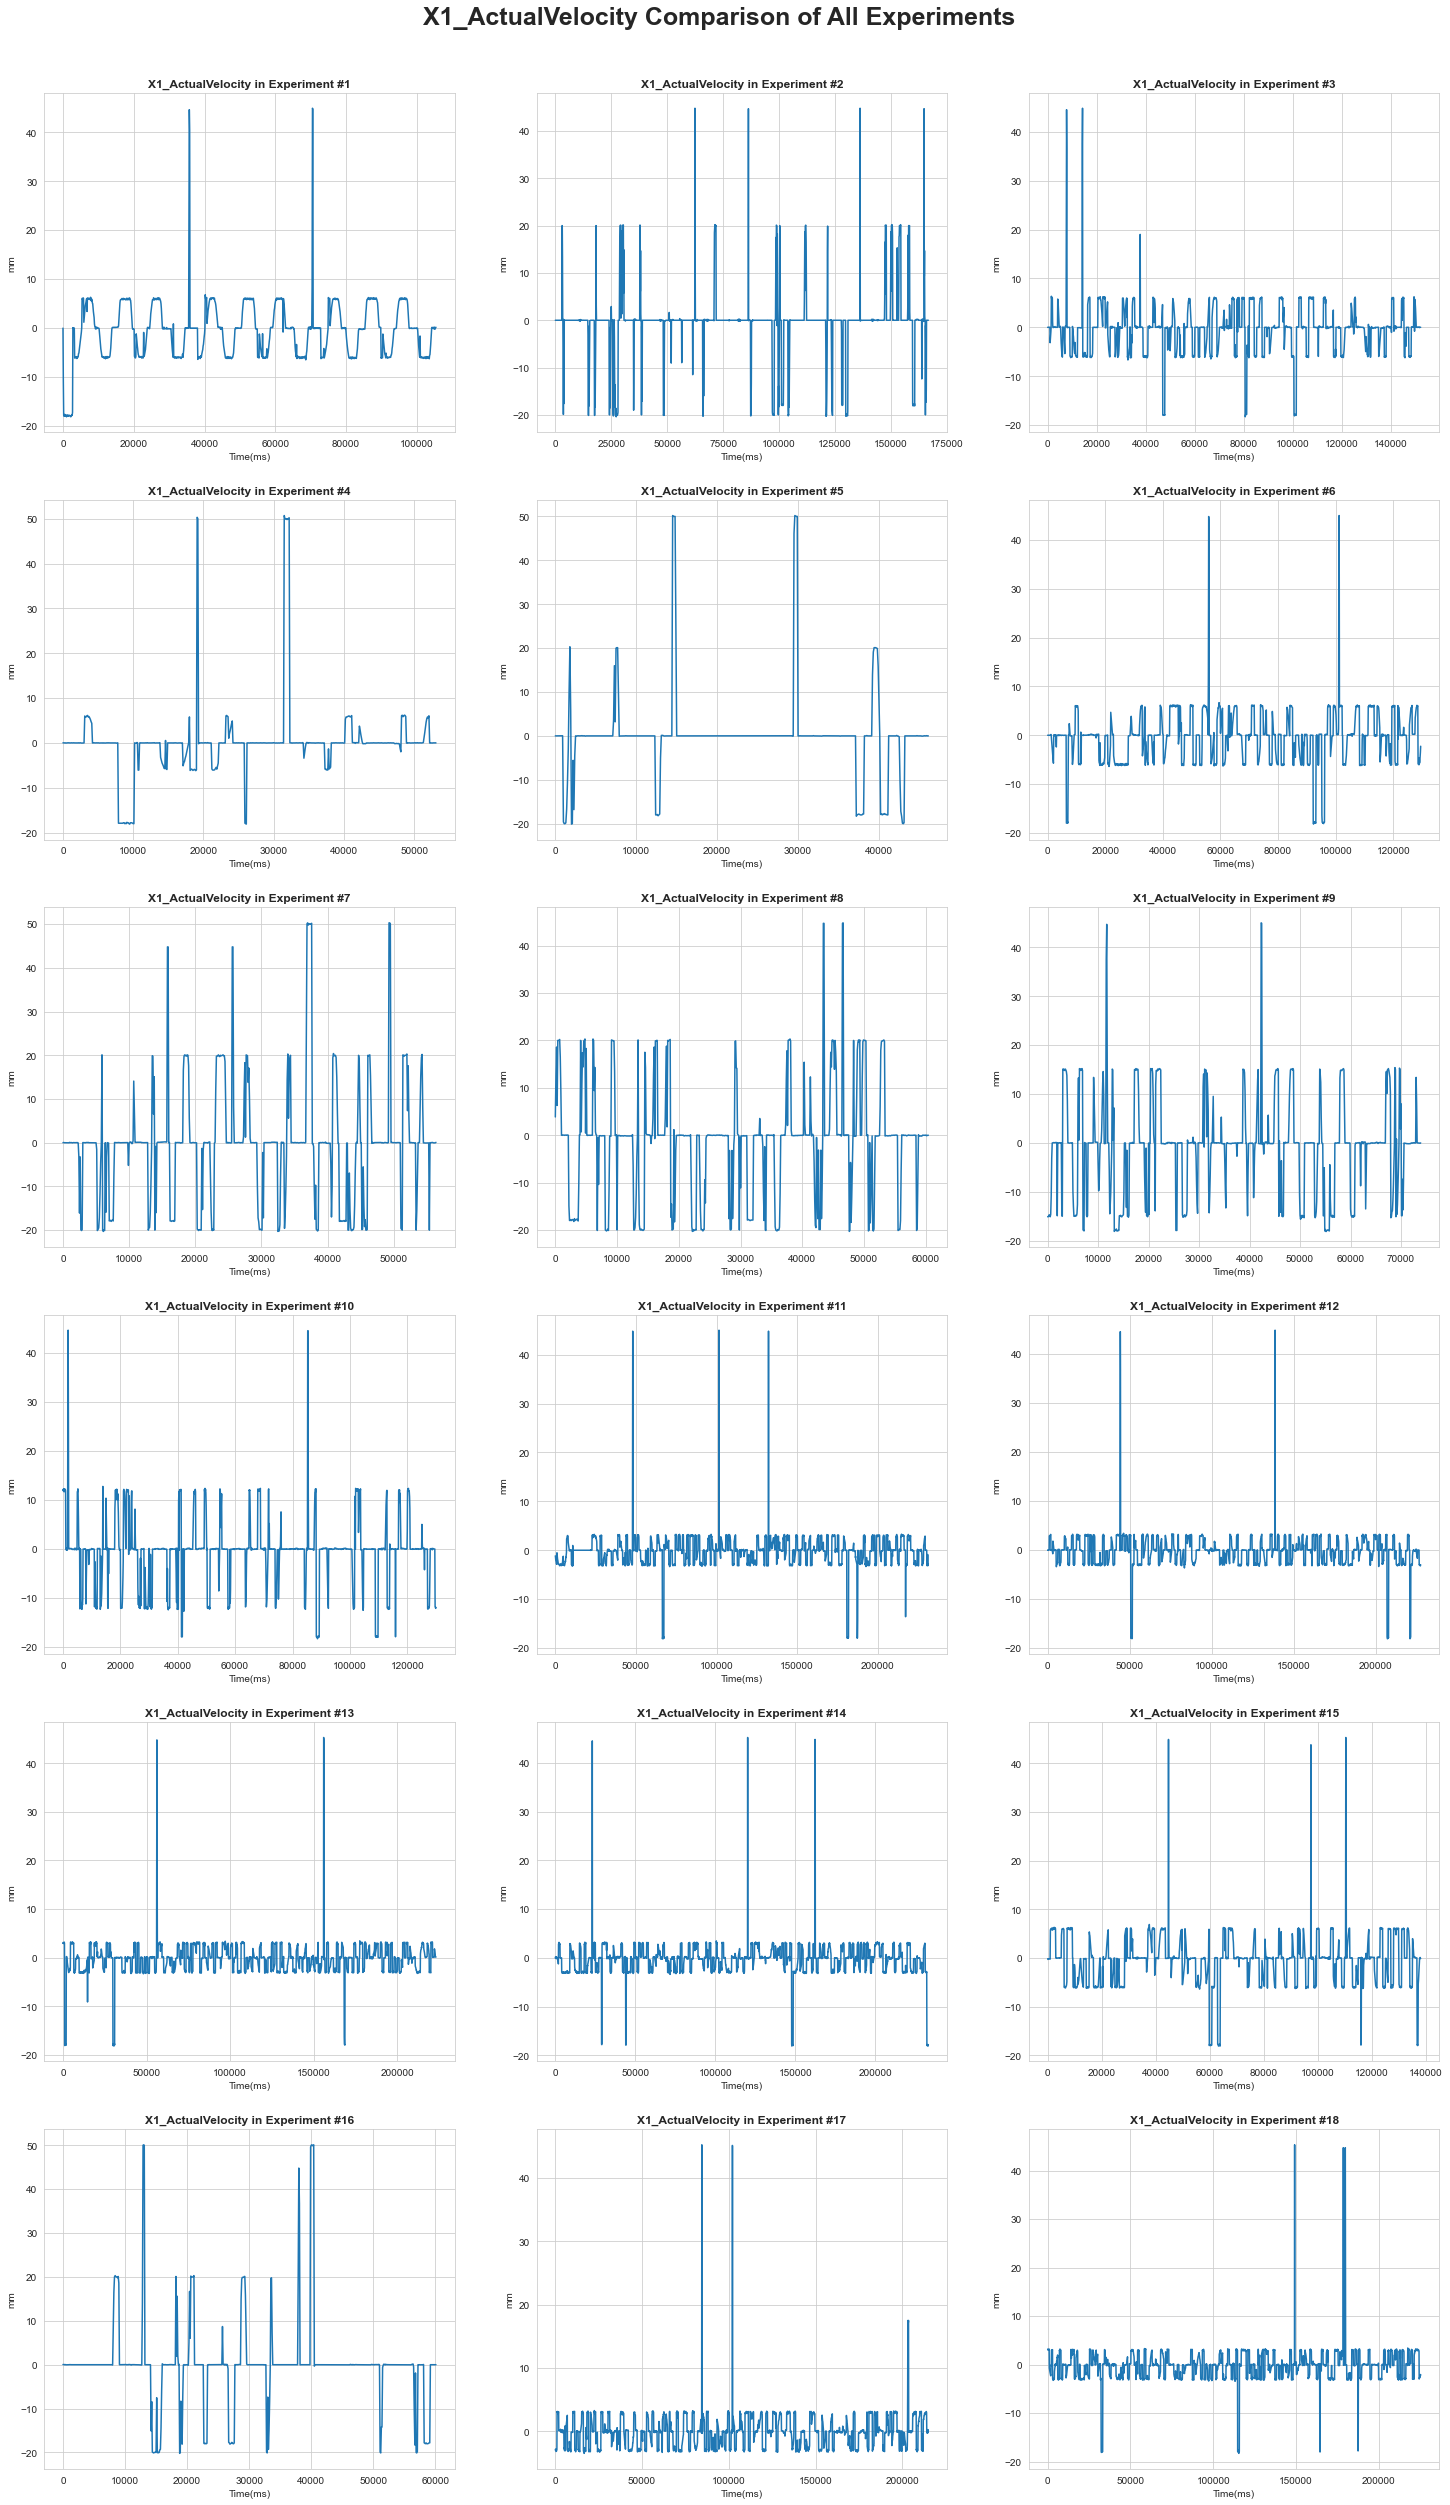

In [99]:
sns.set_style('whitegrid')
fig,axes = plt.subplots(6,3, figsize=(25, 40),sharex=False)
fig.suptitle('X1_ActualVelocity Comparison of All Experiments', fontsize=25,fontweight='bold')
fig.subplots_adjust(top=0.95)
axes = axes.ravel()     # This line is ABSOLUTELY necessary because it makes it so that we read the axes in a line

for i in range(1,19):
    axes[i-1].plot(df_final[df_final['exp_no']==i]['Time(ms)'],df_final[df_final['exp_no']==i]['X1_ActualVelocity'])
    axes[i-1].set_title('X1_ActualVelocity in Experiment #{}'.format(i),fontweight='bold')
    axes[i-1].set_ylabel('mm')
    axes[i-1].set_xlabel('Time(ms)')

## EDA - Univariate Analysis
### Position

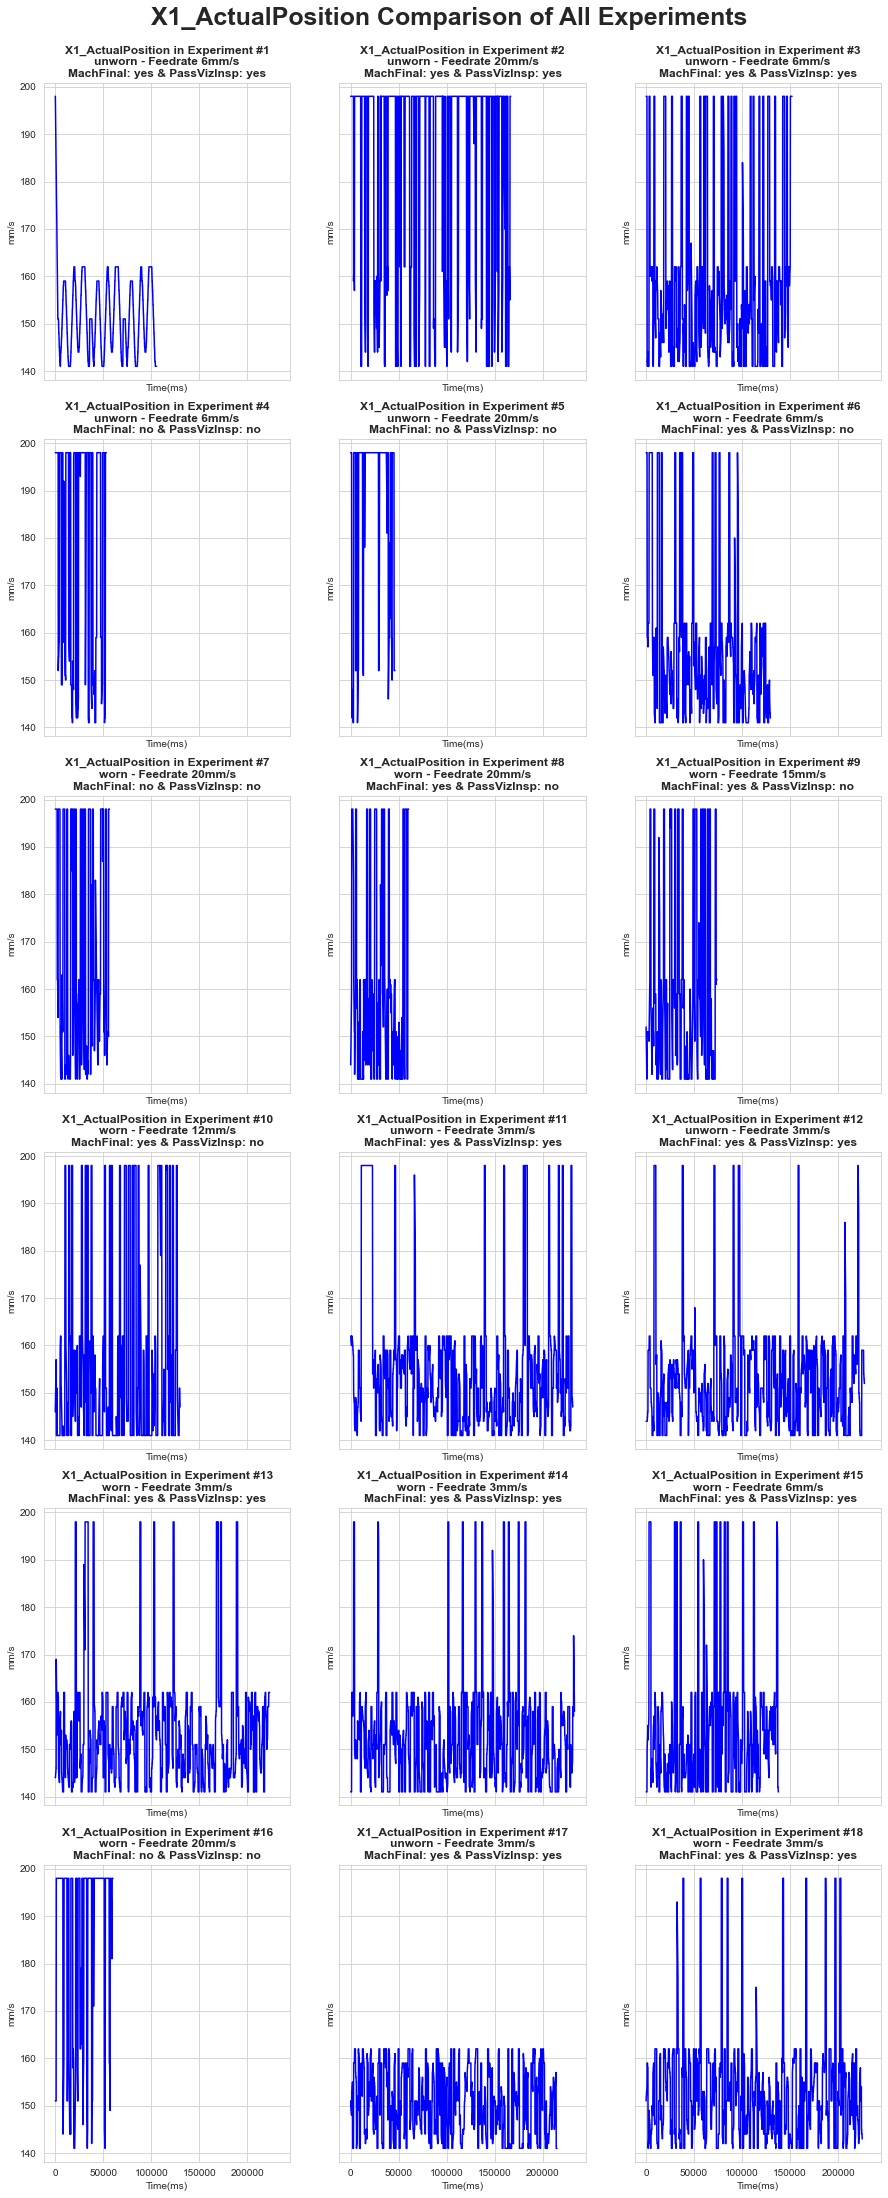

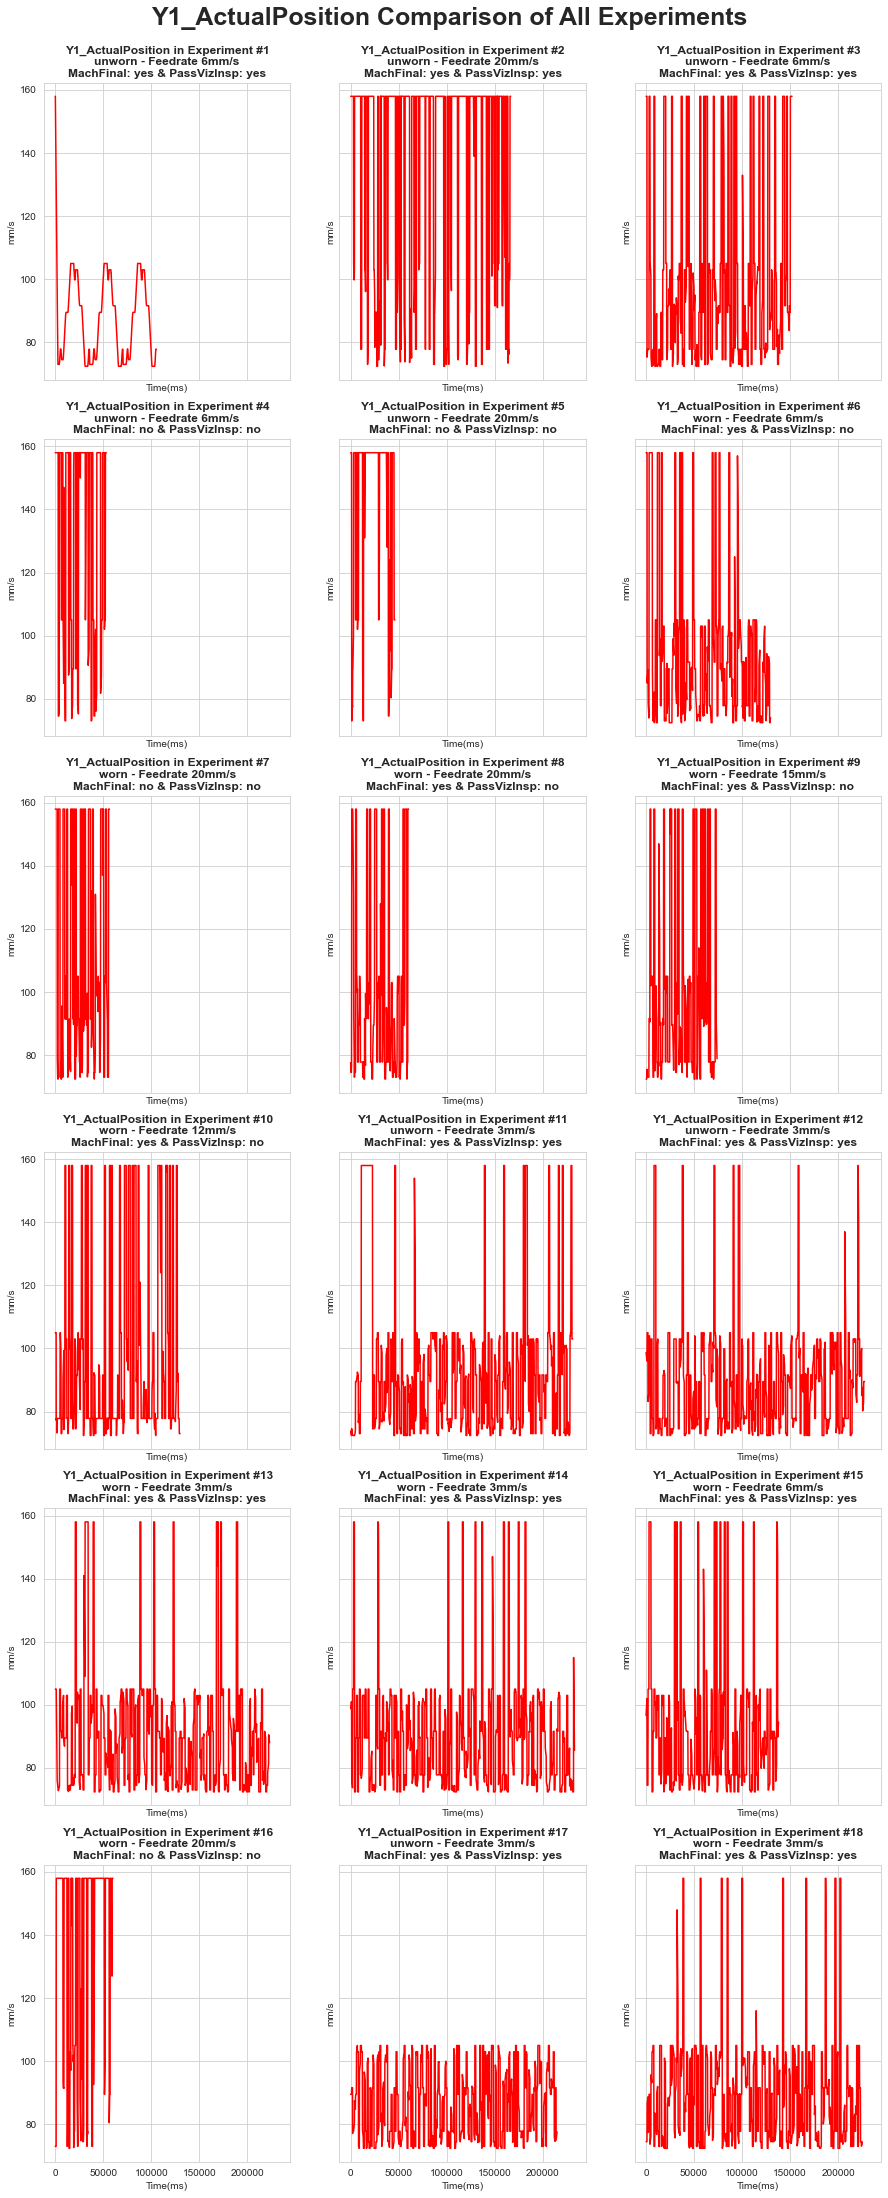

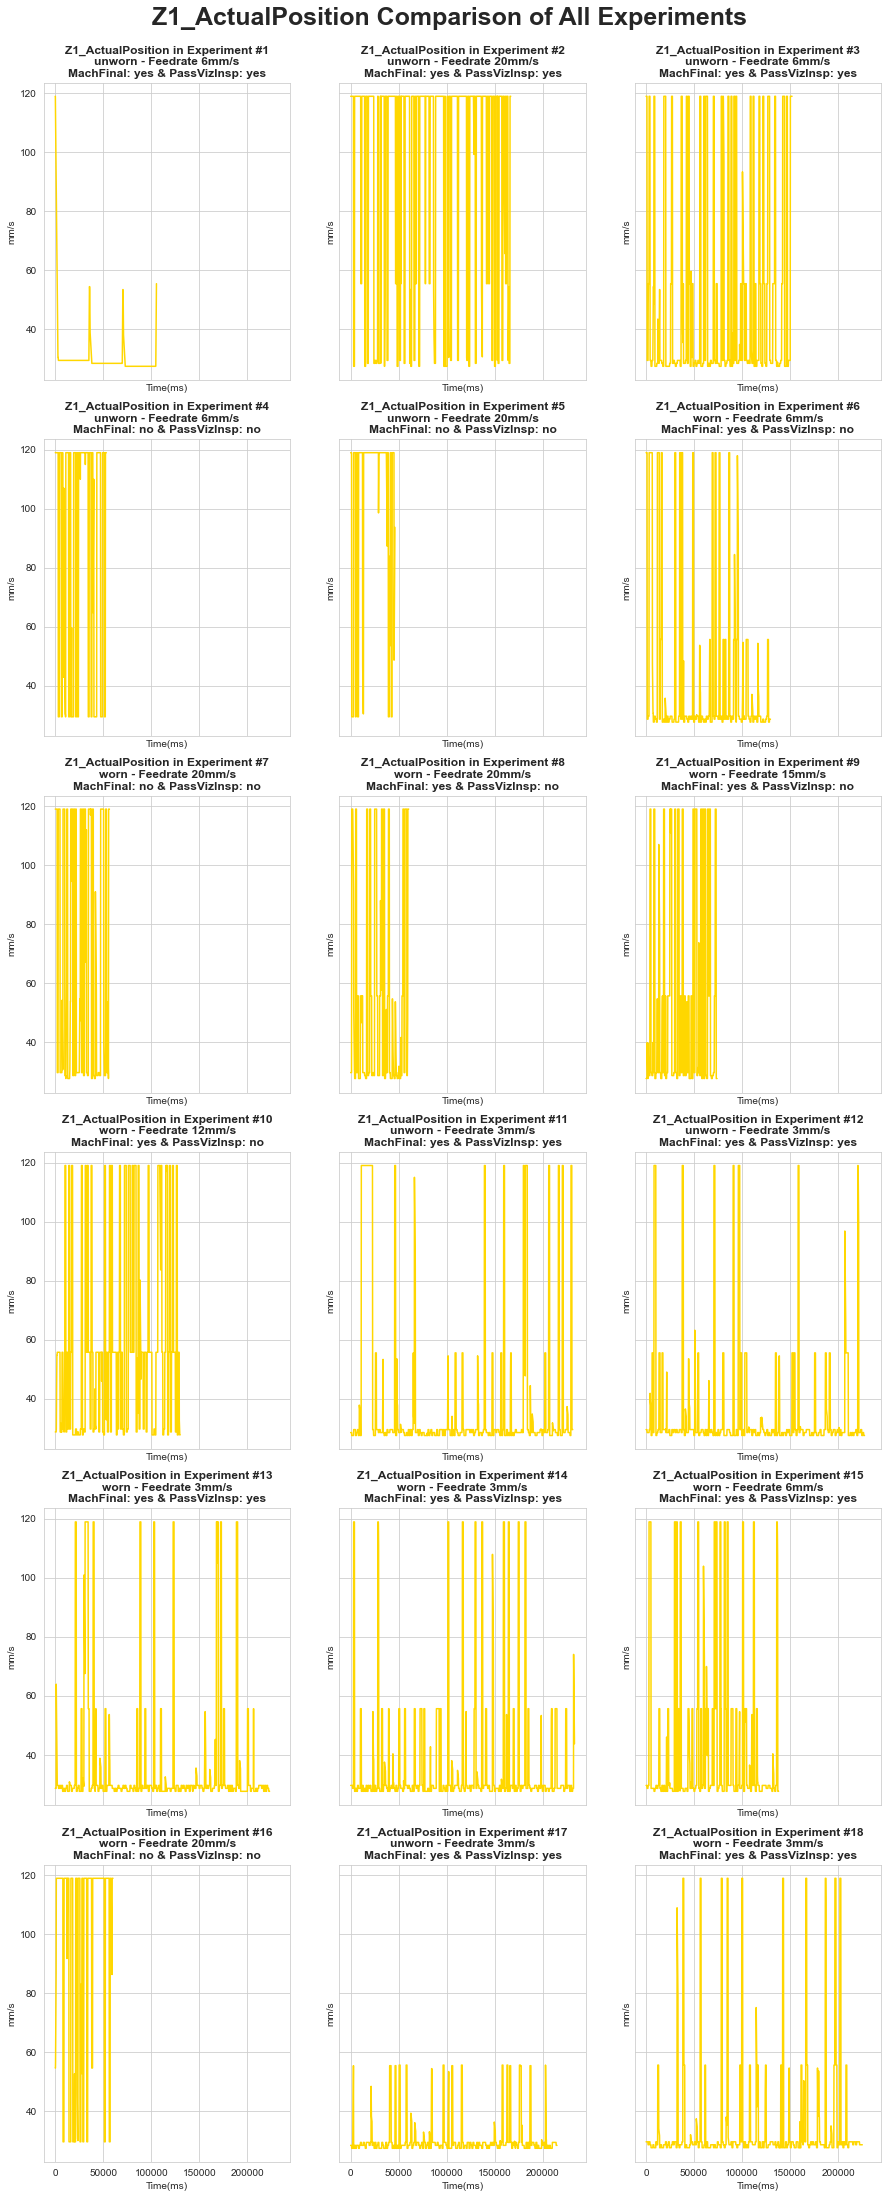

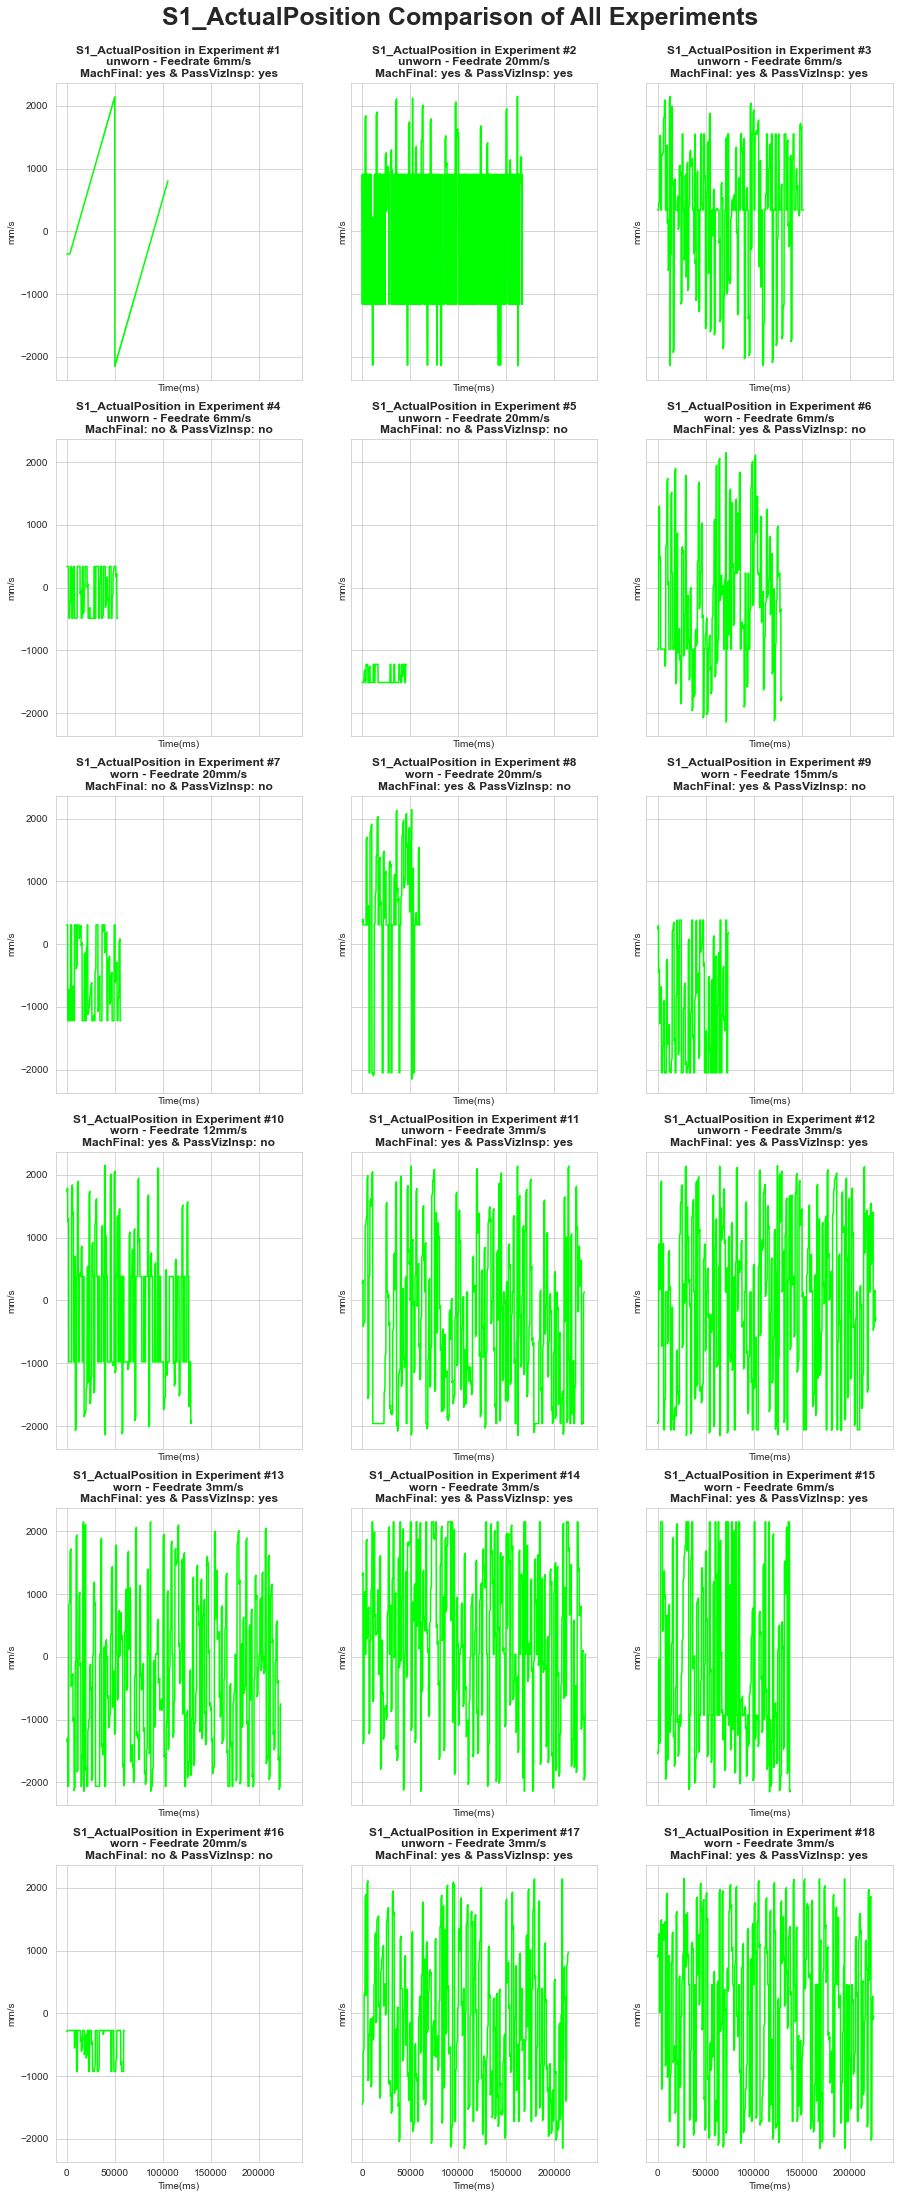

In [100]:
def comp_plot(parameter,ylabel):
    sns.set_style('whitegrid')
    for axis in ['X1_','Y1_','Z1_','S1_',]:
        if axis == 'X1_':
            color = 'blue'
        elif axis == 'Y1_':
            color = 'red'
        elif axis == 'Z1_':
            color = 'gold'
        else:
            color = 'lime'
        fig,axes = plt.subplots(6,3, figsize=(15, 35),sharex=True,sharey=True)
        fig.suptitle('{} Comparison of All Experiments'.format(axis+parameter), fontsize=25,fontweight='bold')
        fig.subplots_adjust(top=0.95)
        axes = axes.ravel()     # This line is ABSOLUTELY necessary because it makes it so that we read the axes in a line
        for i in range(1,19):
            axes[i-1].plot(df_final[df_final['exp_no']==i]['Time(ms)'],df_final[df_final['exp_no']==i][axis+parameter],color=color)
            axes[i-1].set_title('{} in Experiment #{}\n{} - Feedrate {}mm/s\nMachFinal: {} & PassVizInsp: {}'.
                                format(axis+parameter,i,df_final[df_final['exp_no']==i]['tool_condition'].unique()[0],
                                       df_final[df_final['exp_no']==i]['feedrate'].unique()[0],
                                       df_final[df_final['exp_no']==i]['machining_finalized'].unique()[0],
                                       df_final[df_final['exp_no']==i]['passed_visual_inspection'].unique()[0]
                                      ),
                                fontweight='bold'
                               )
            axes[i-1].set_ylabel('{}'.format(ylabel))
            axes[i-1].set_xlabel('Time(ms)')

comp_plot('ActualPosition','mm/s')

### Velocity
#### Notes:
- Experiments with worn tools do not show distinct difference compared to unworn tools
- There are noticable variations in amplitude as the feedrate increases
- 

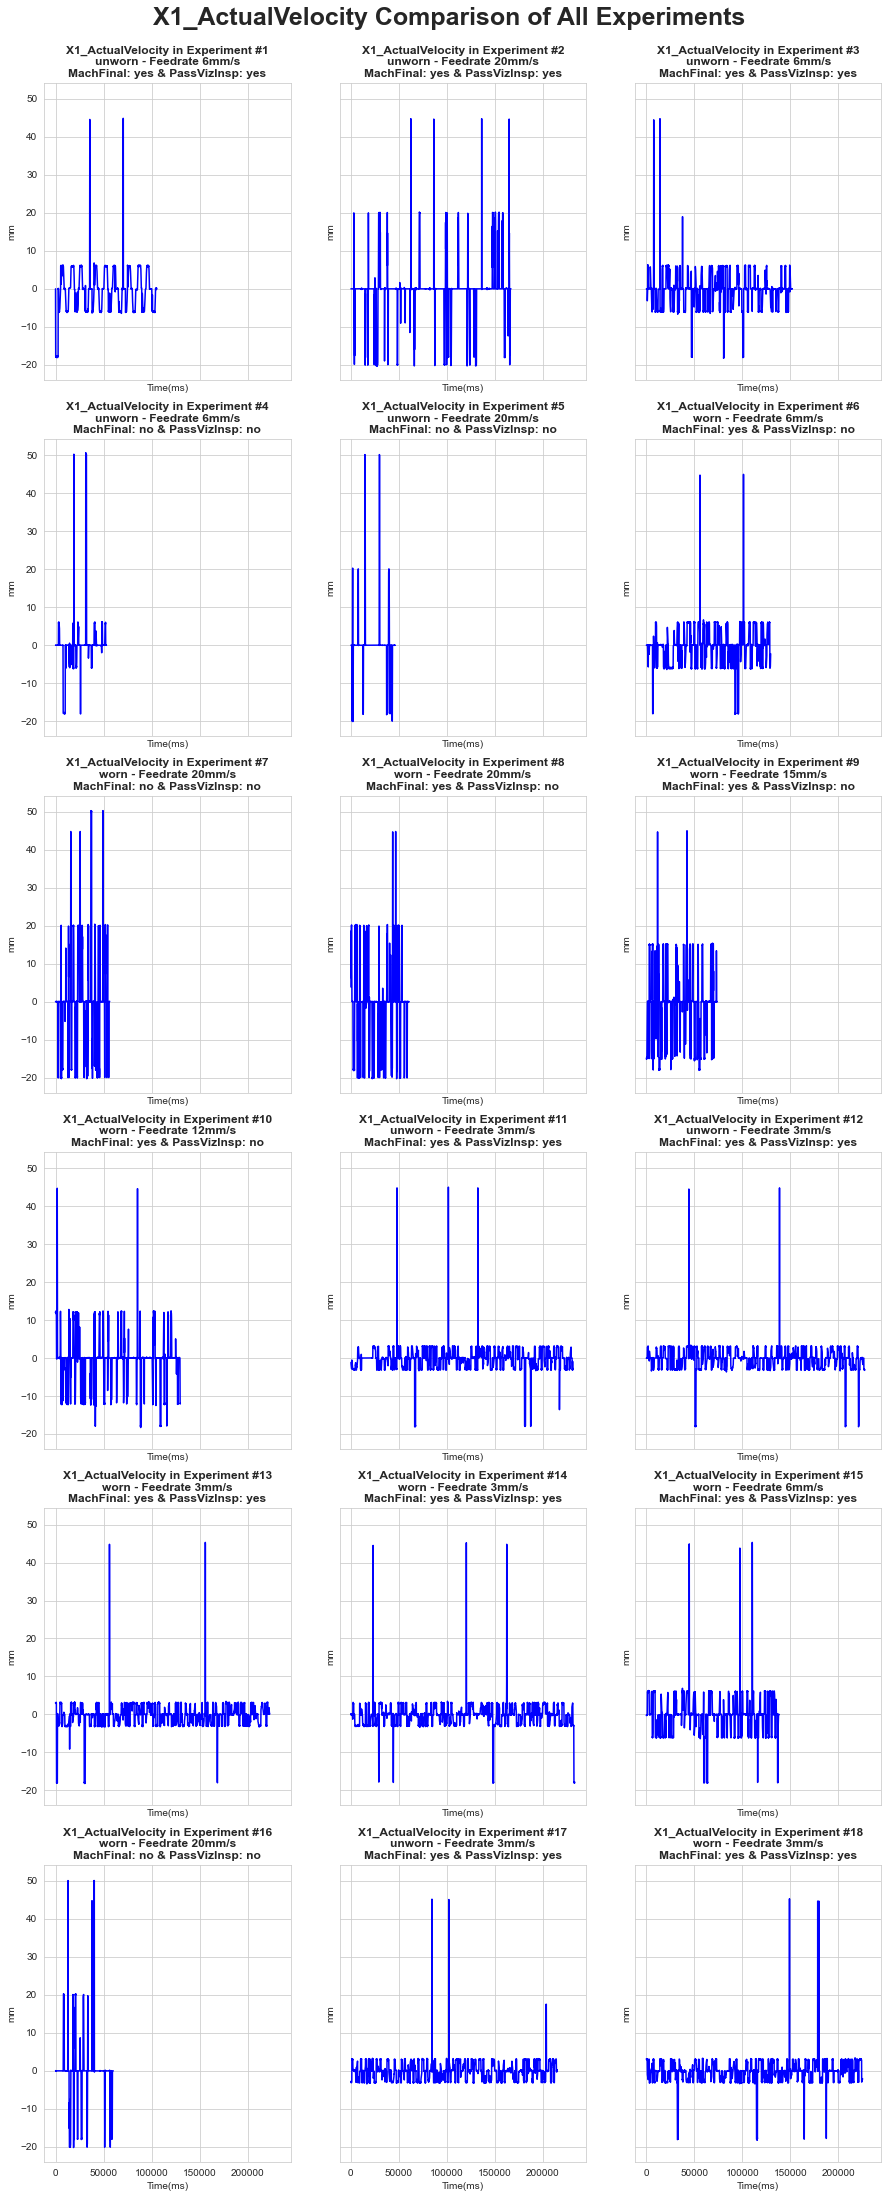

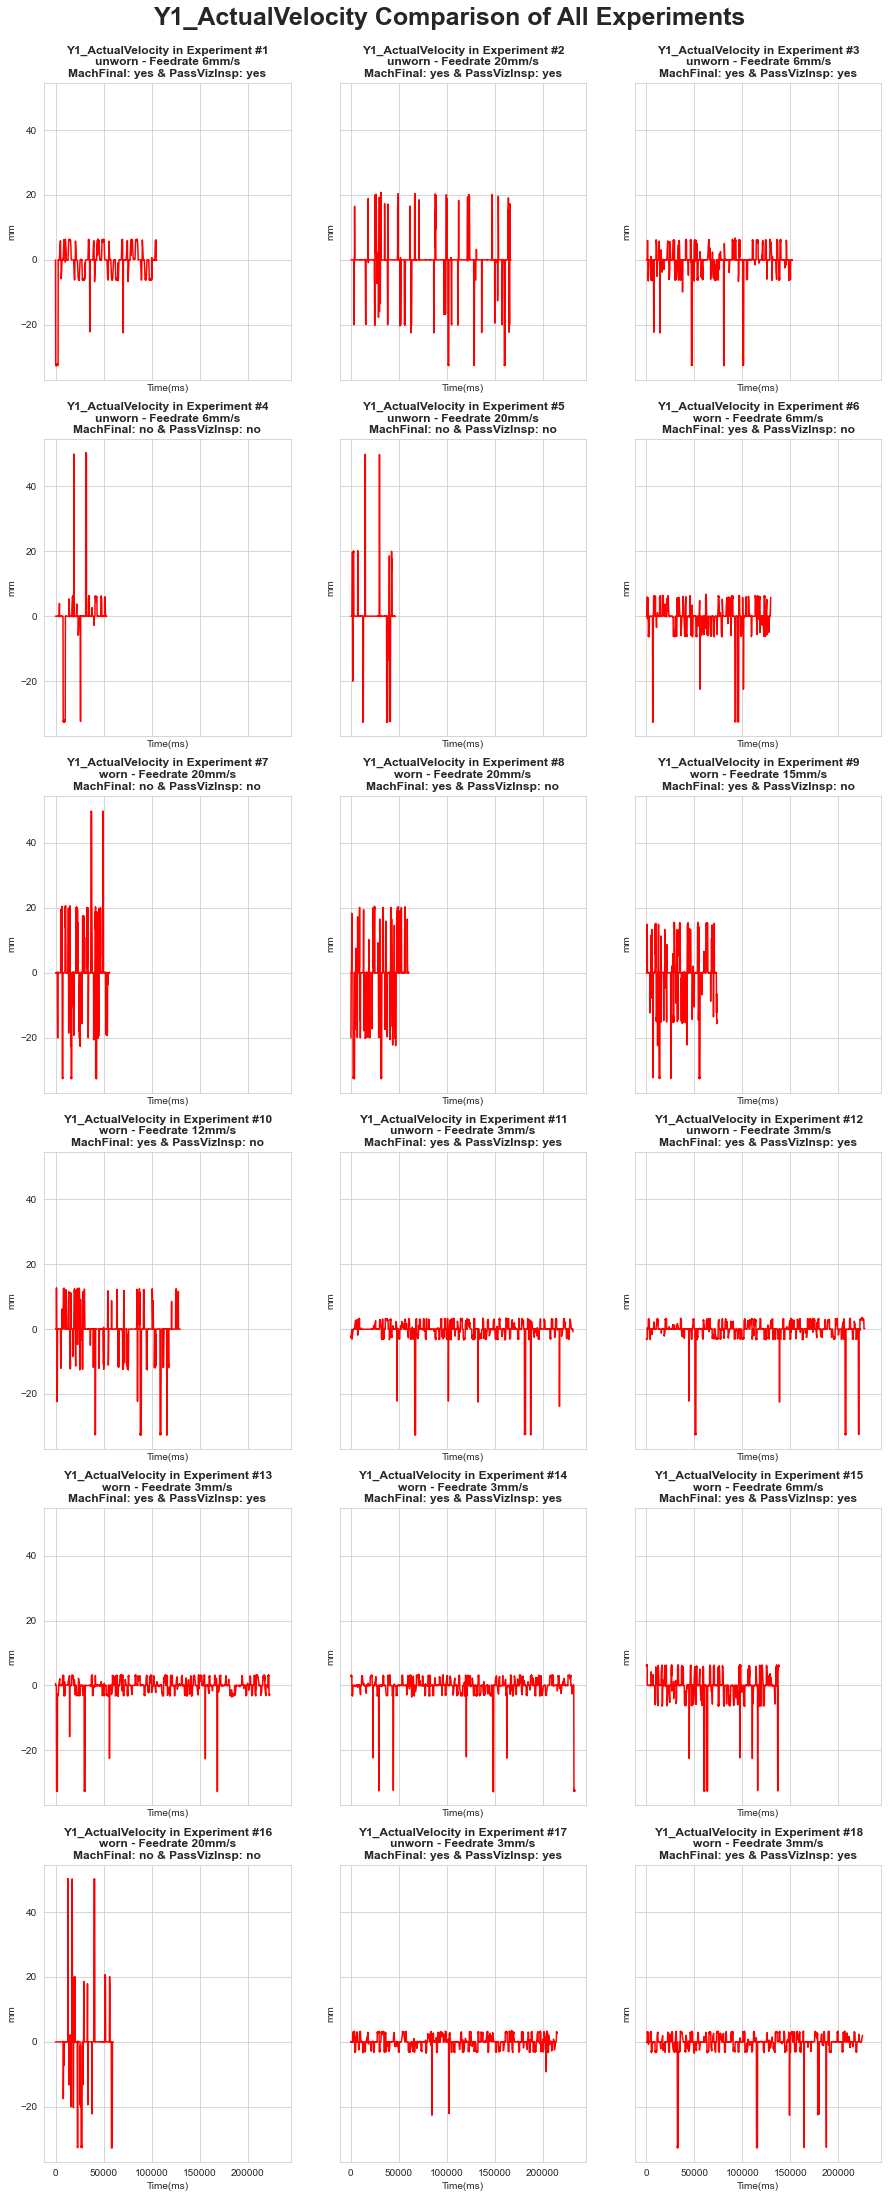

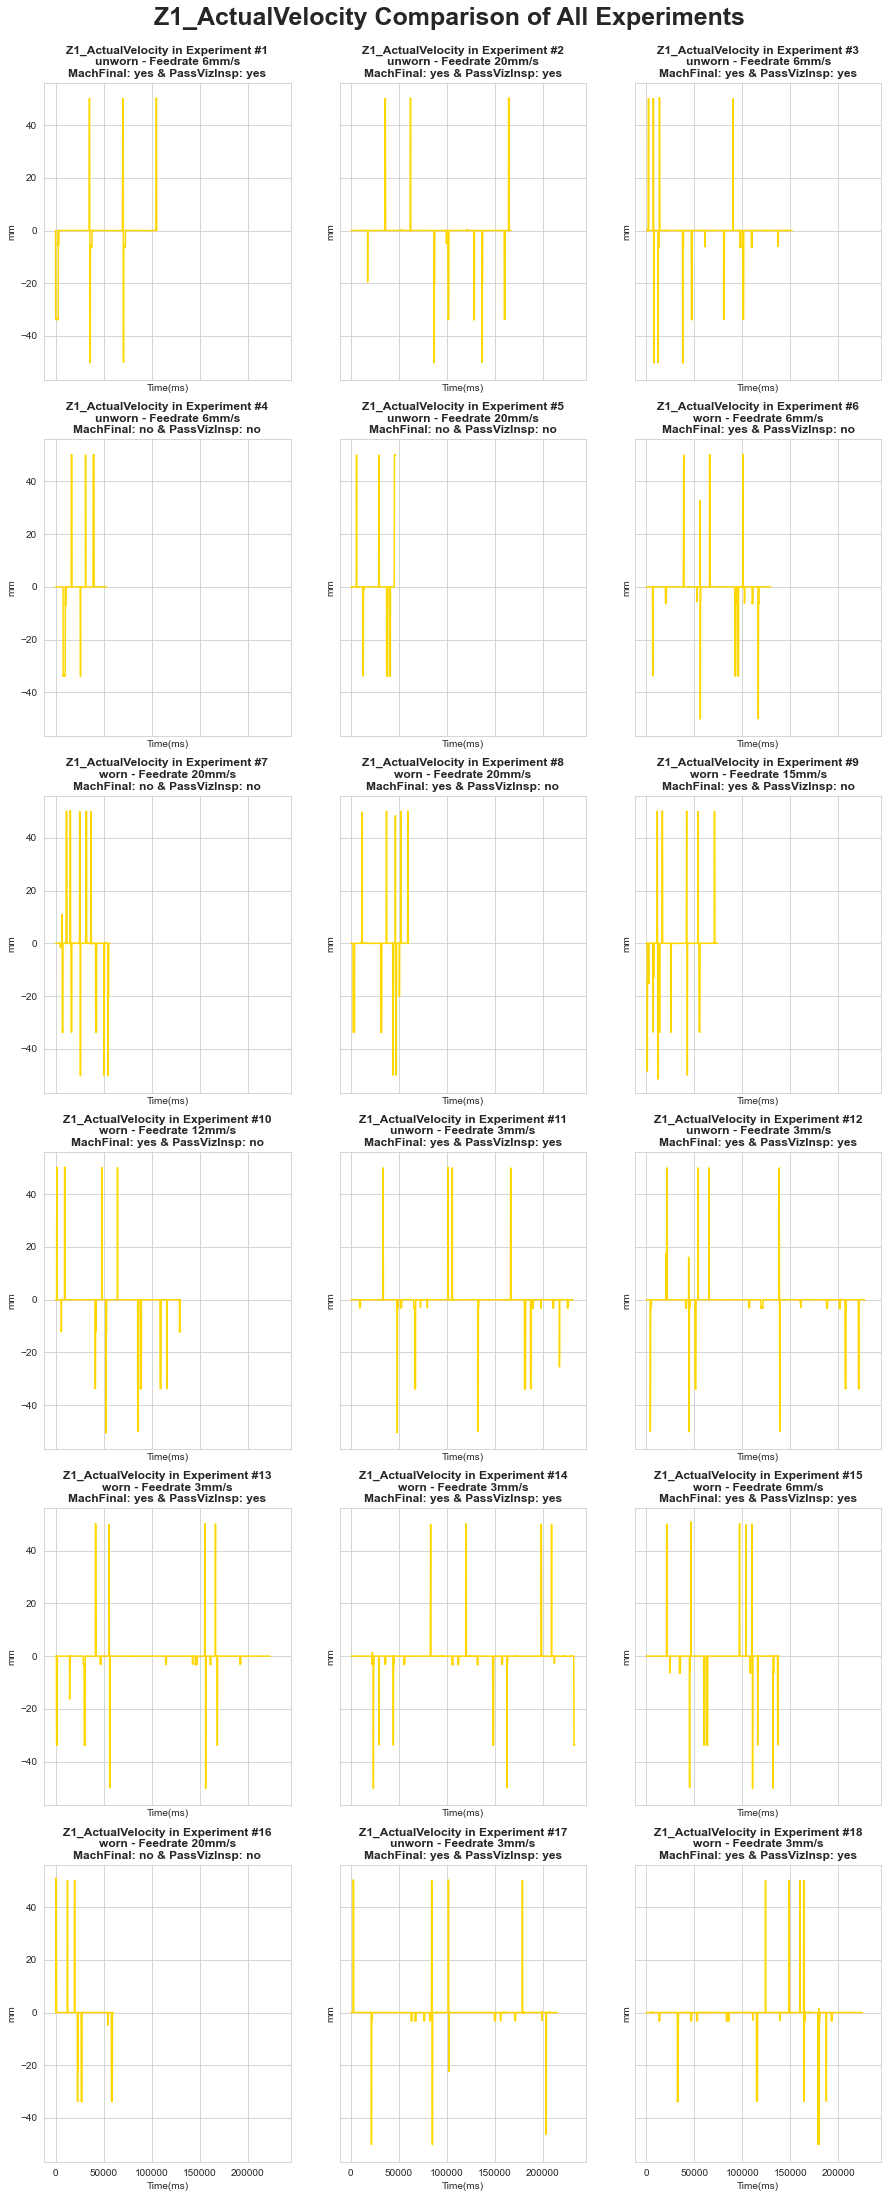

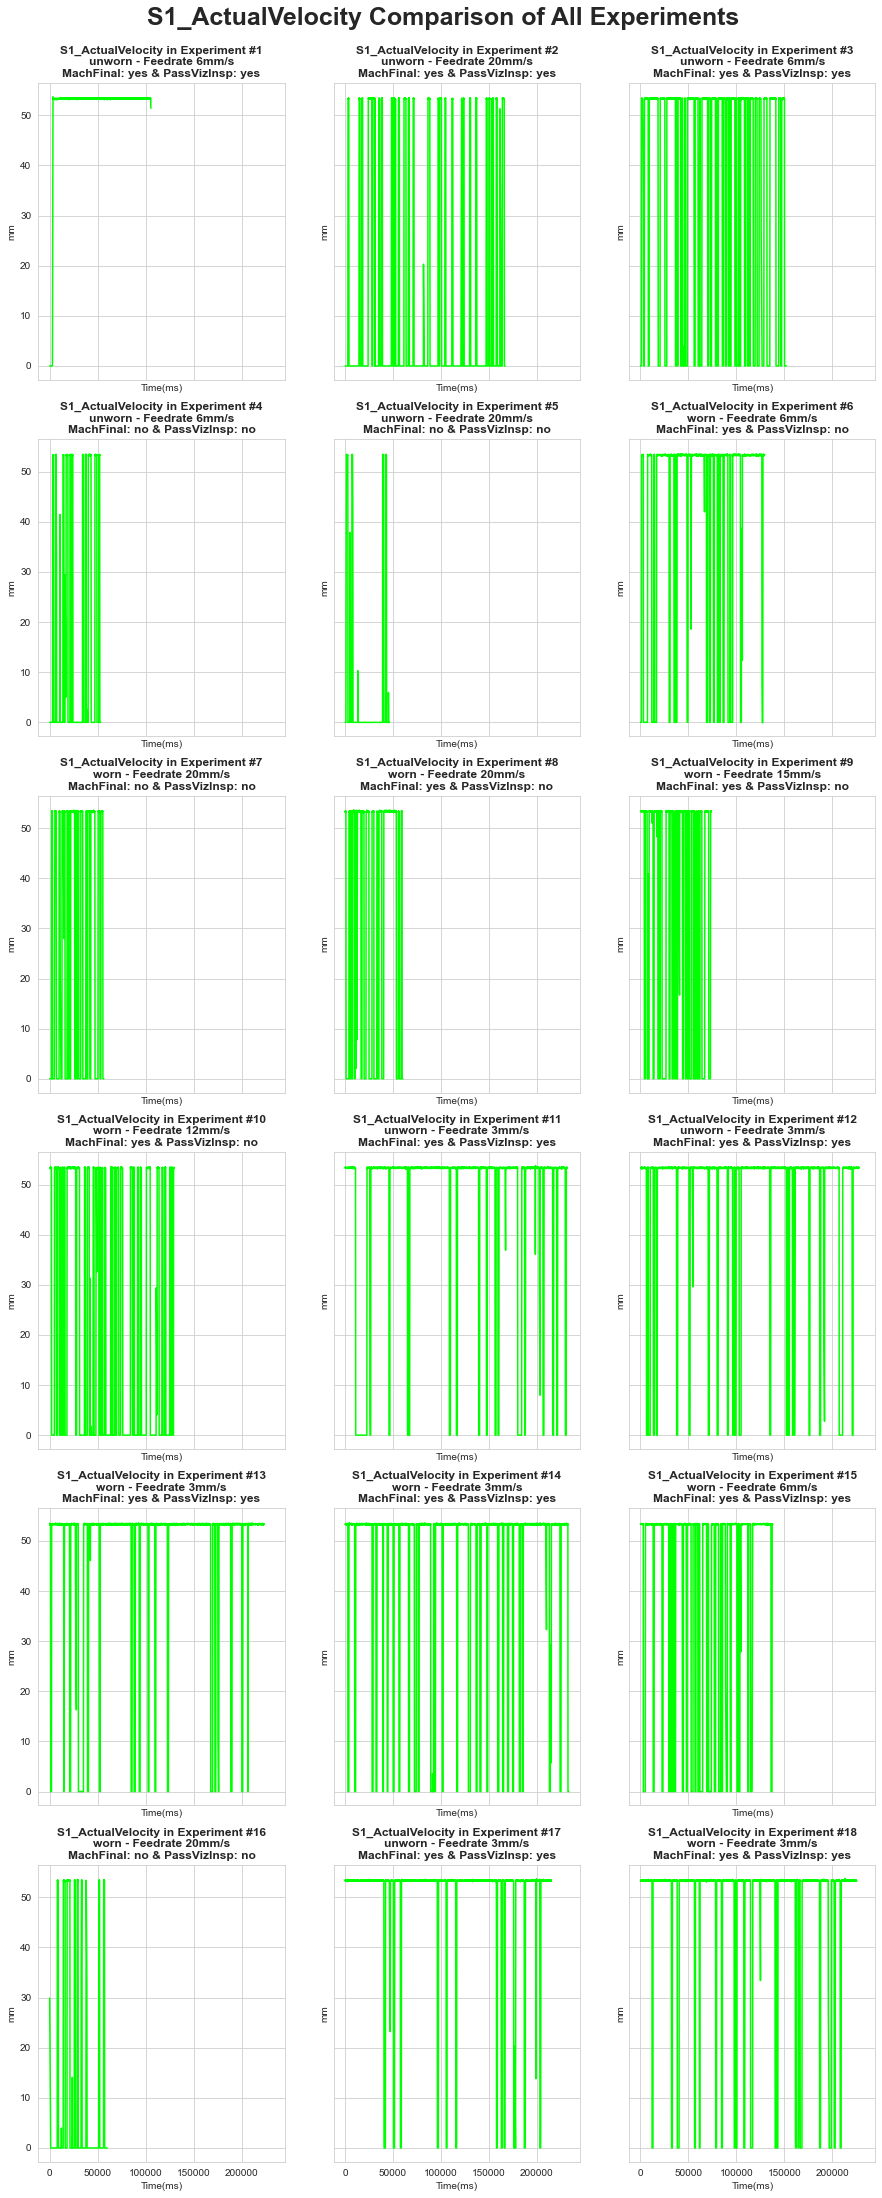

In [101]:
comp_plot('ActualVelocity','mm')

### Acceleration

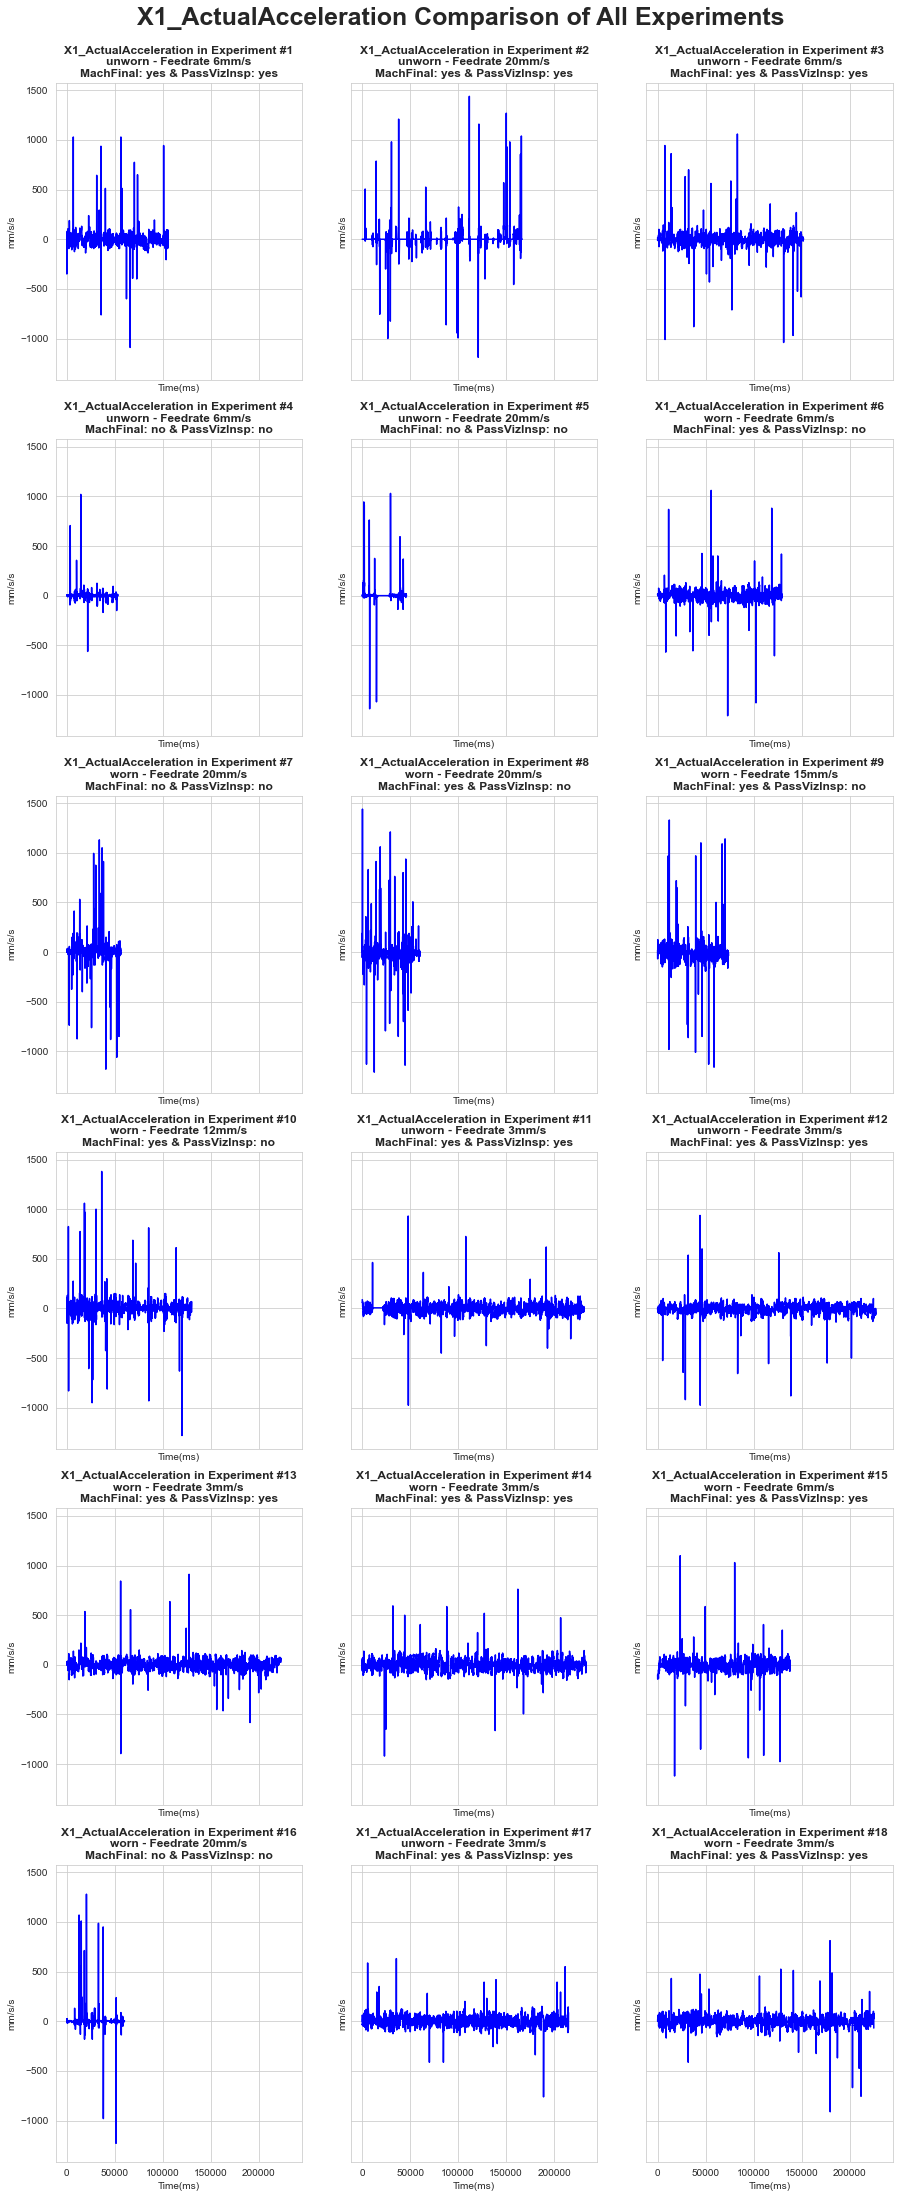

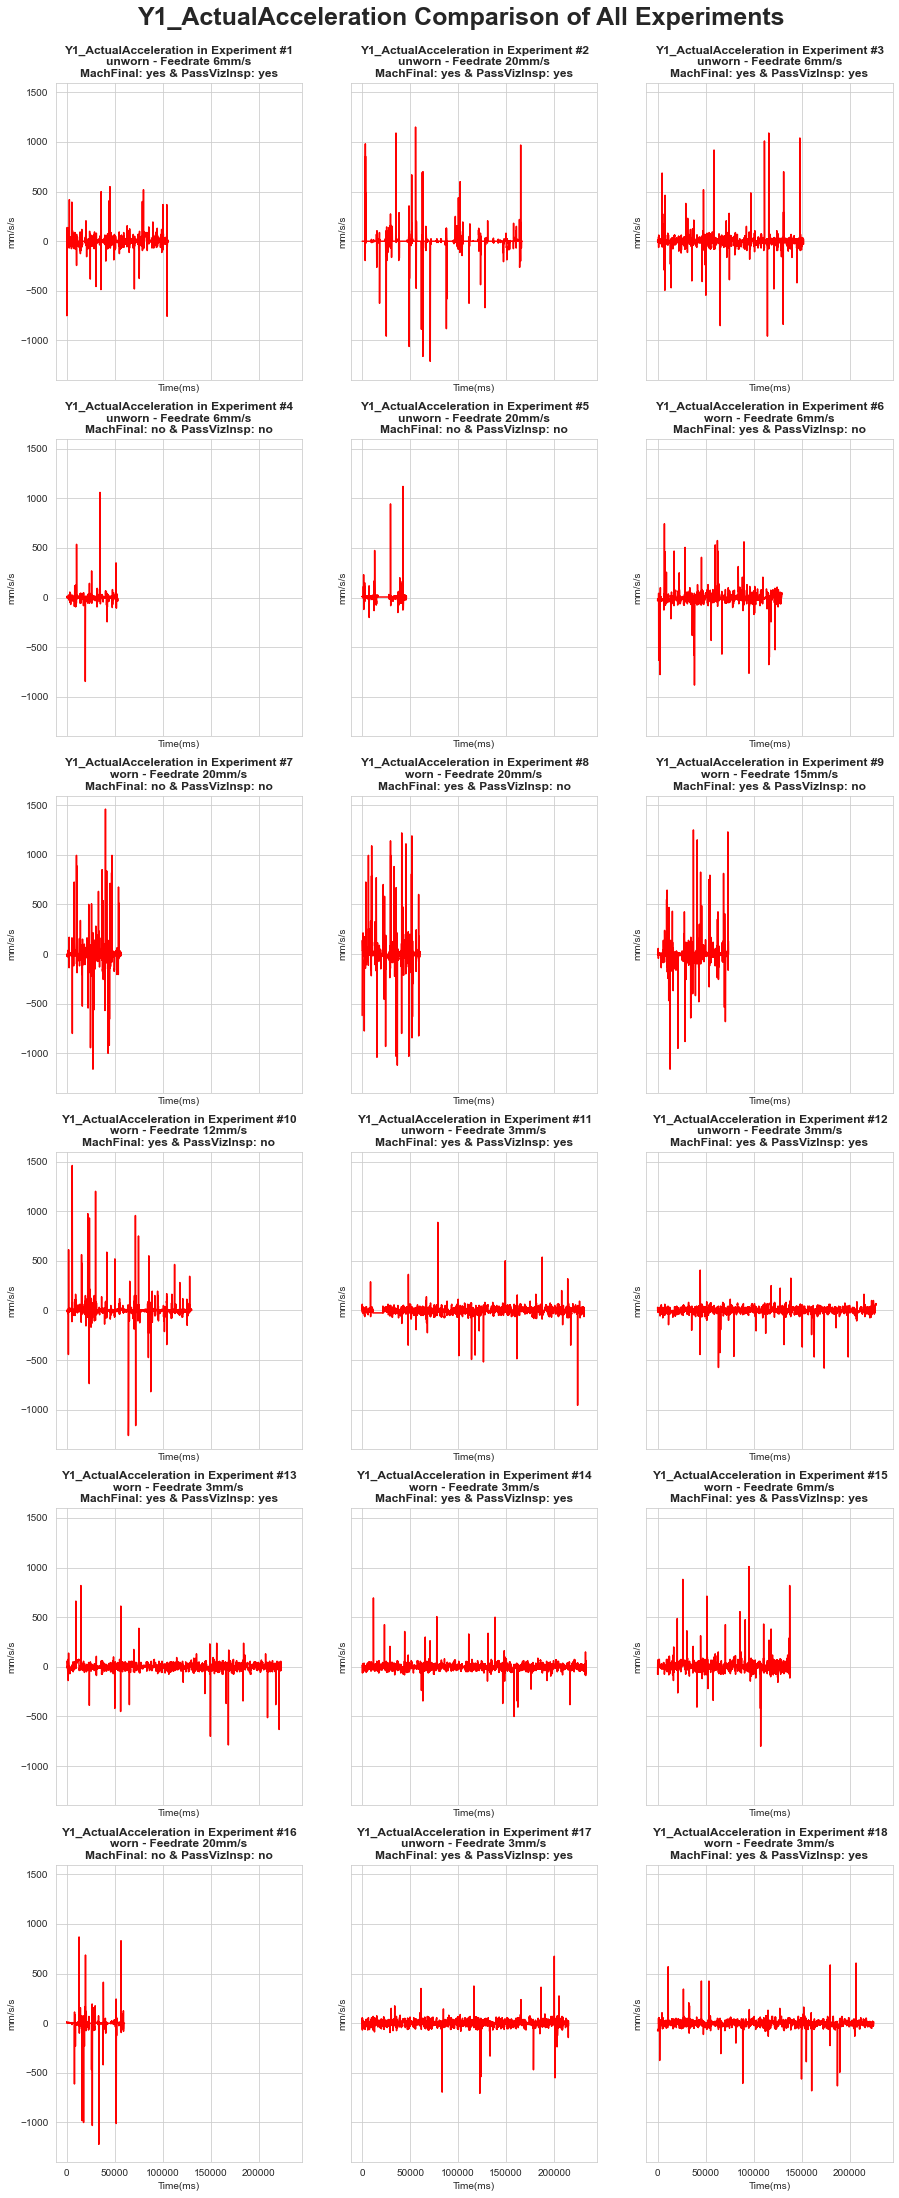

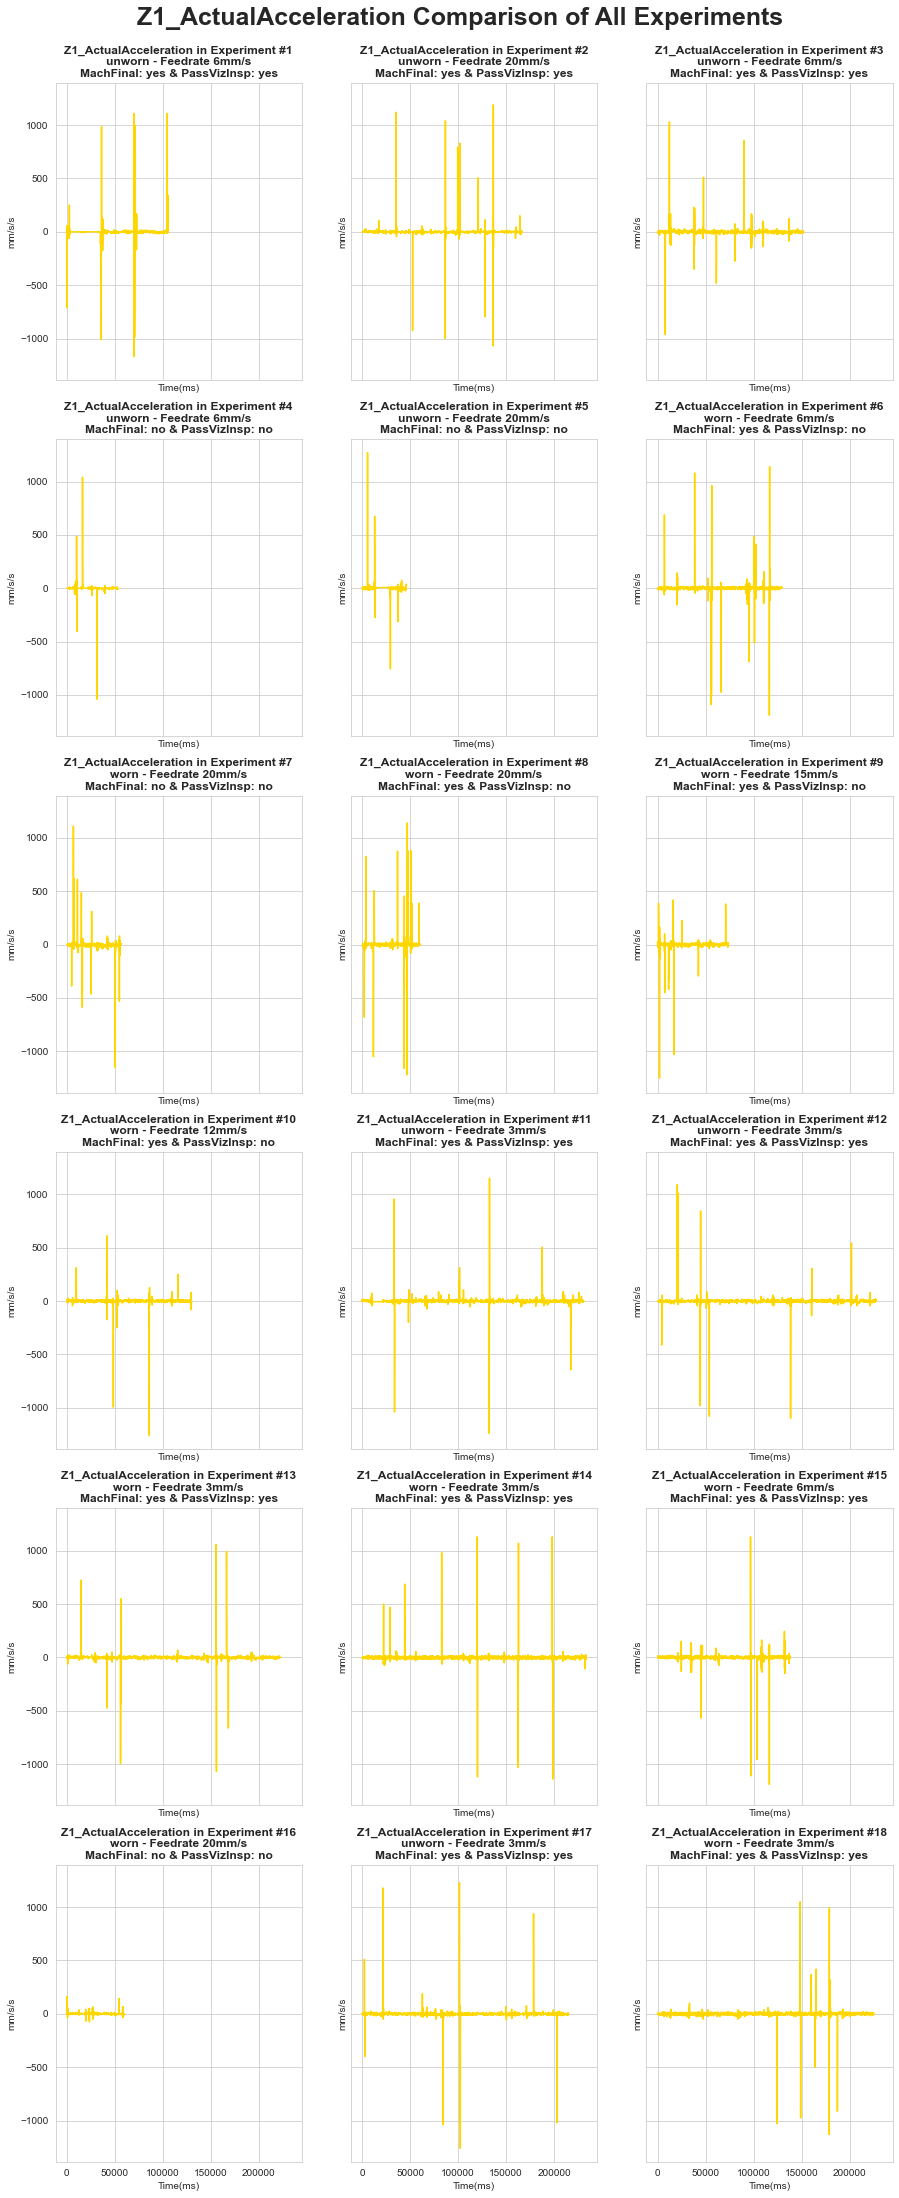

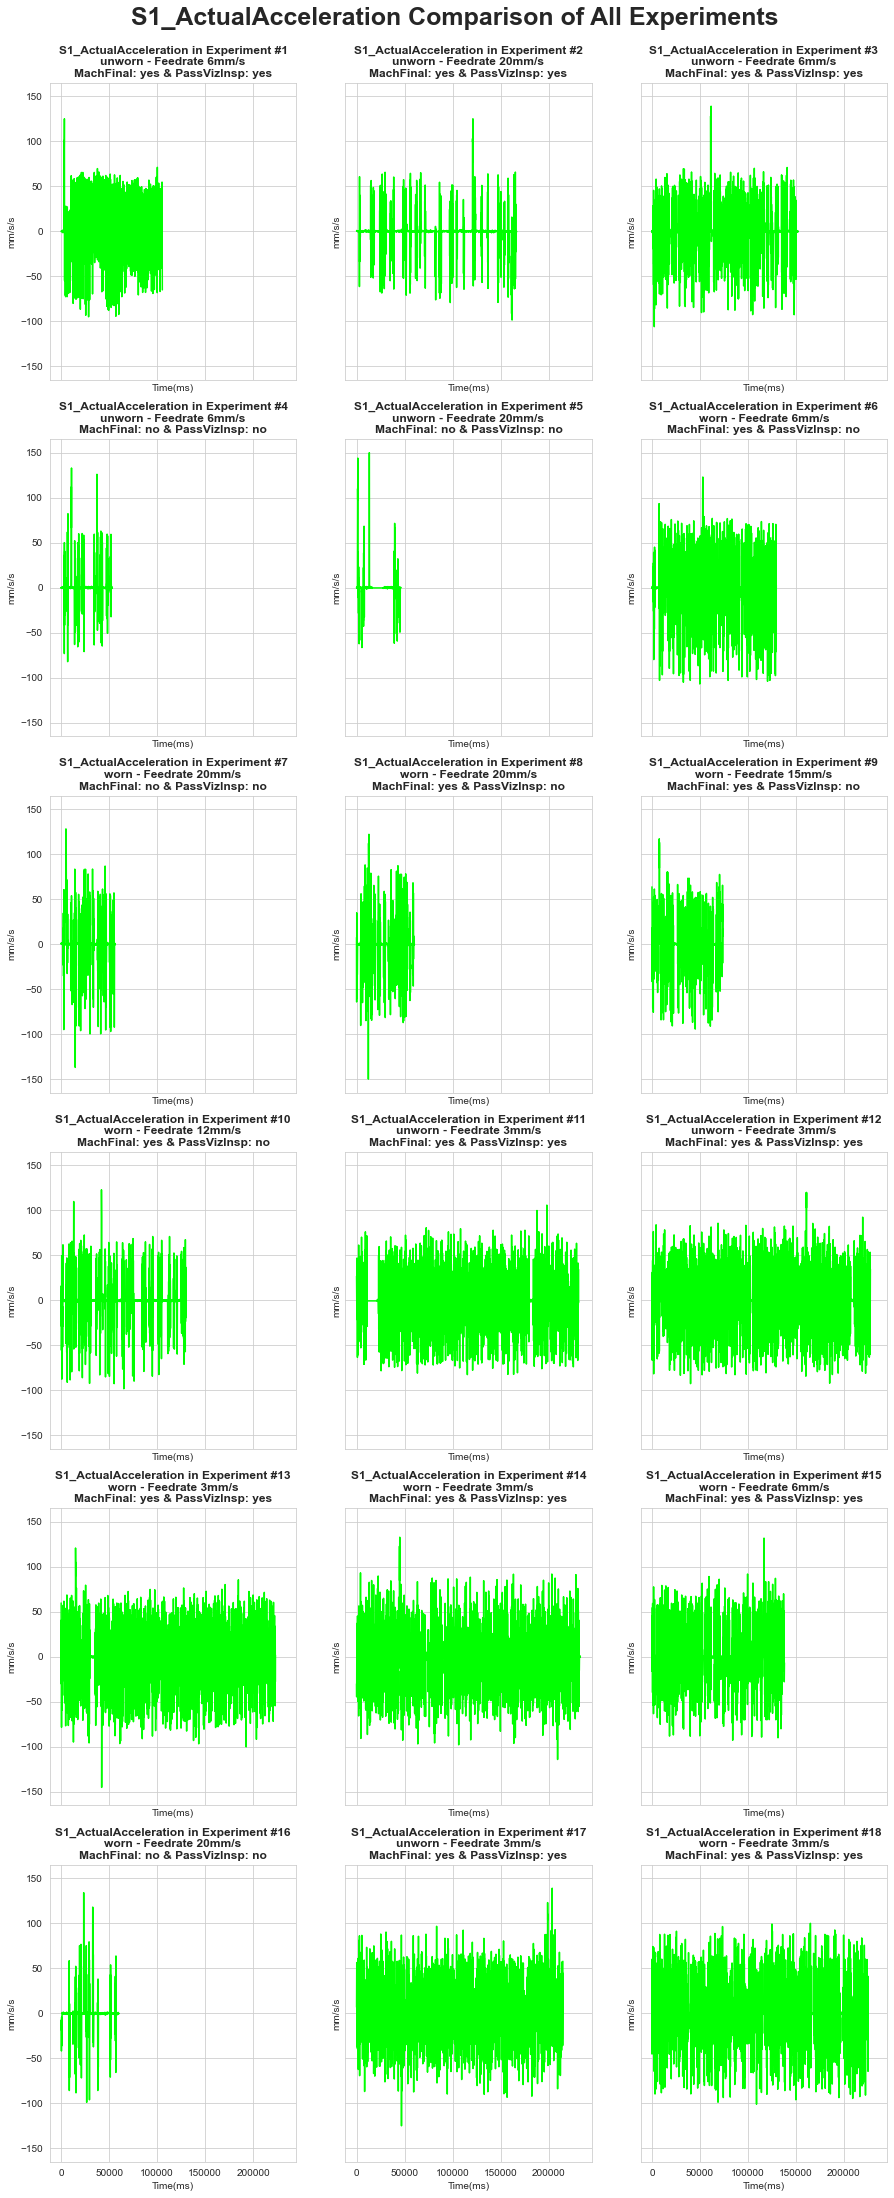

In [102]:
comp_plot('ActualAcceleration','mm/s/s')

### Current Draw

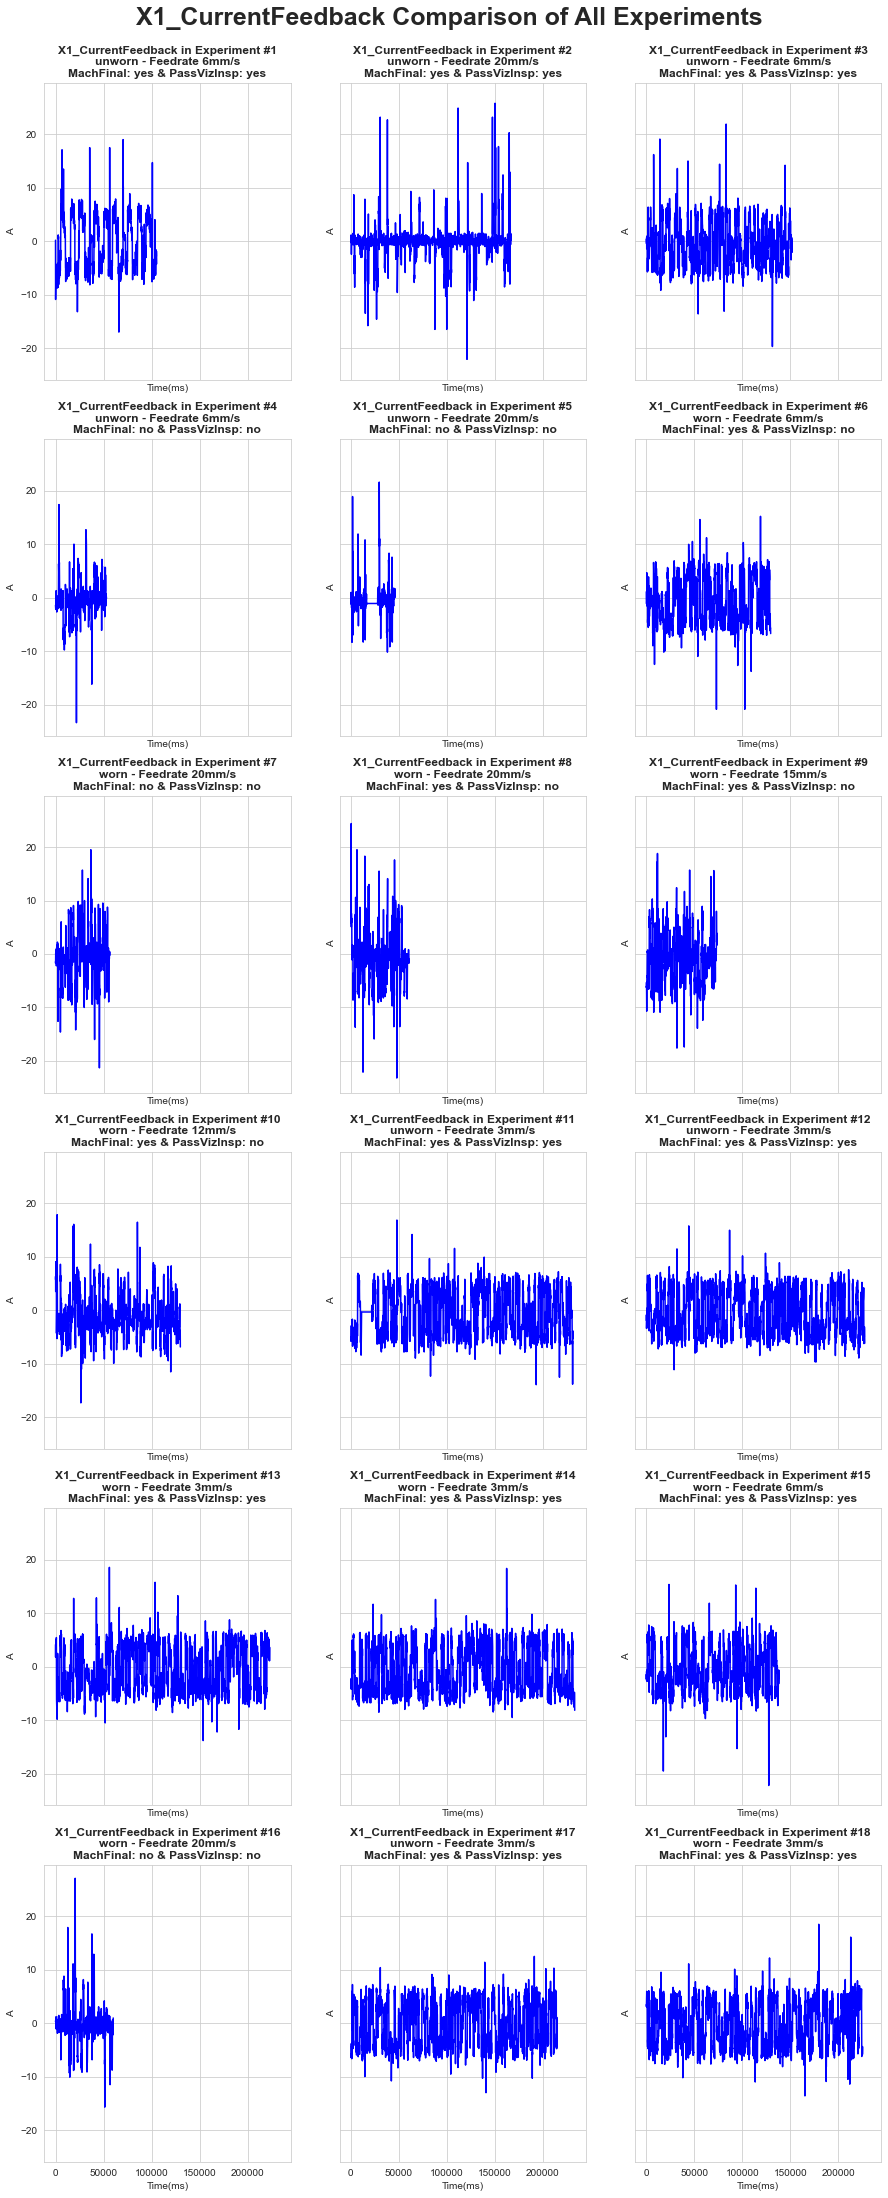

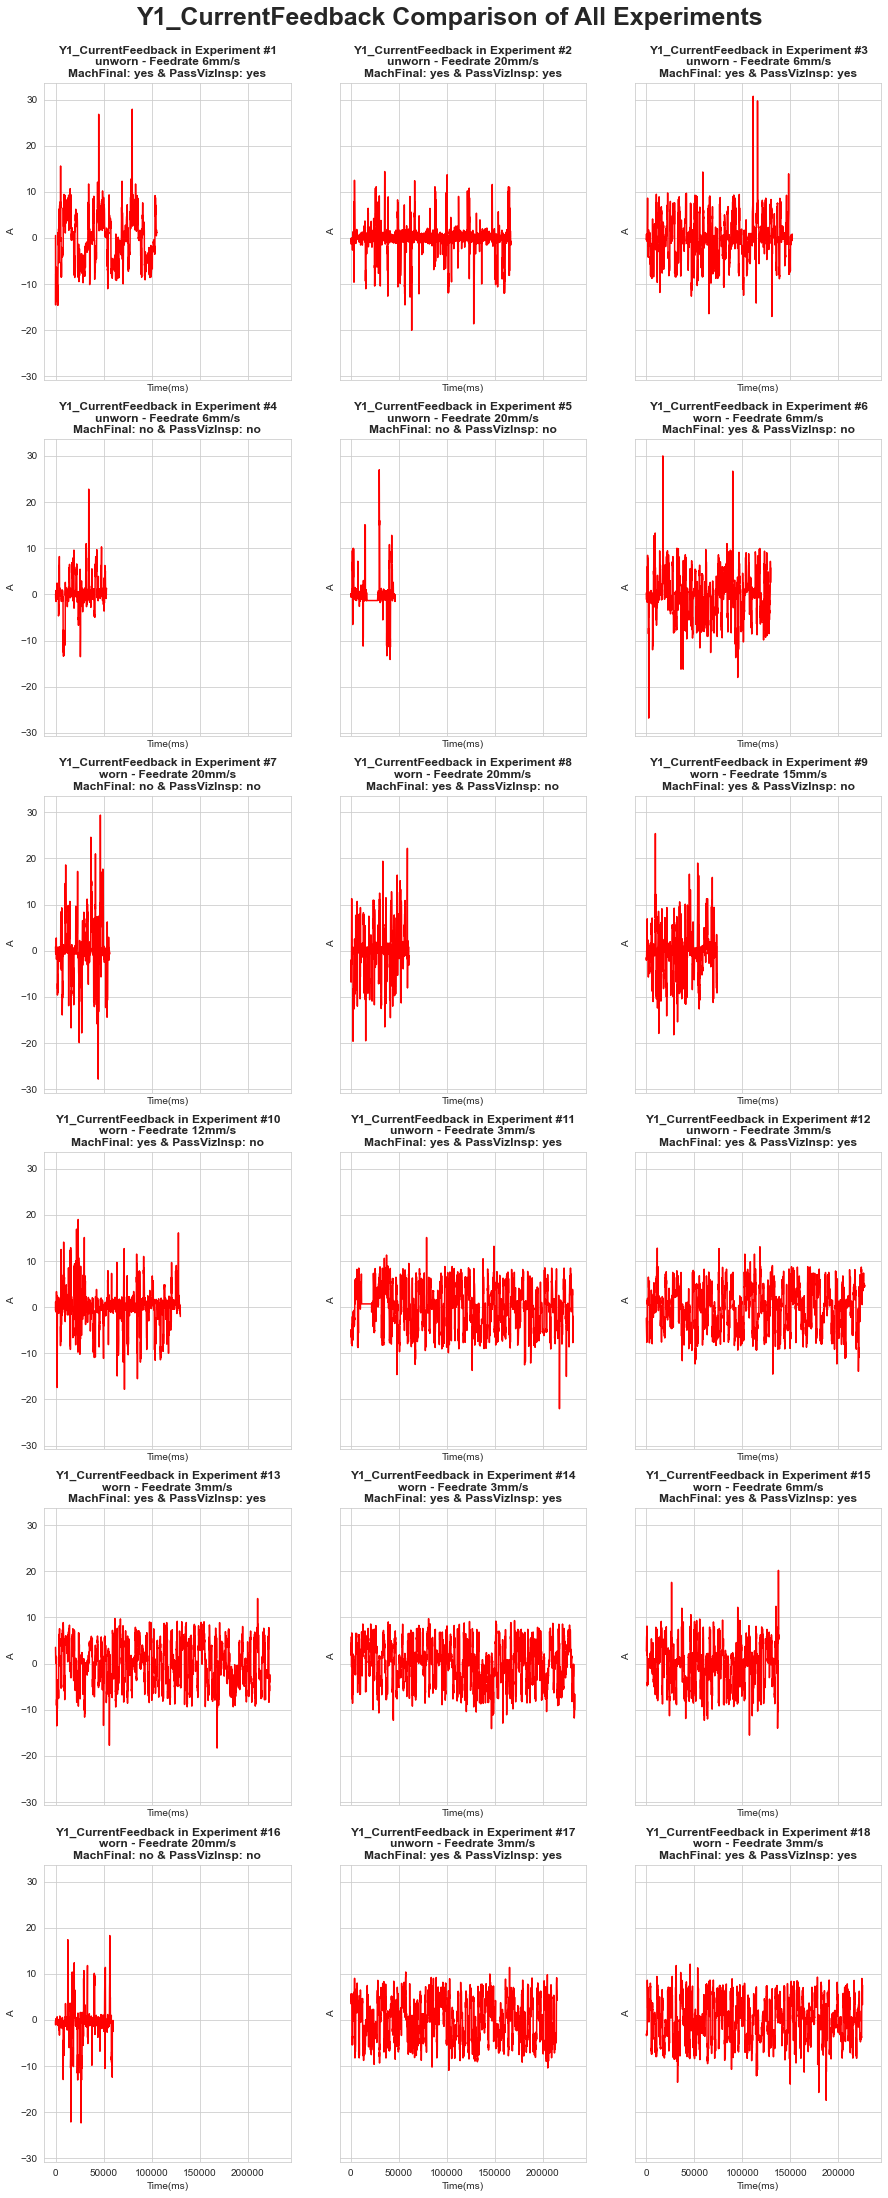

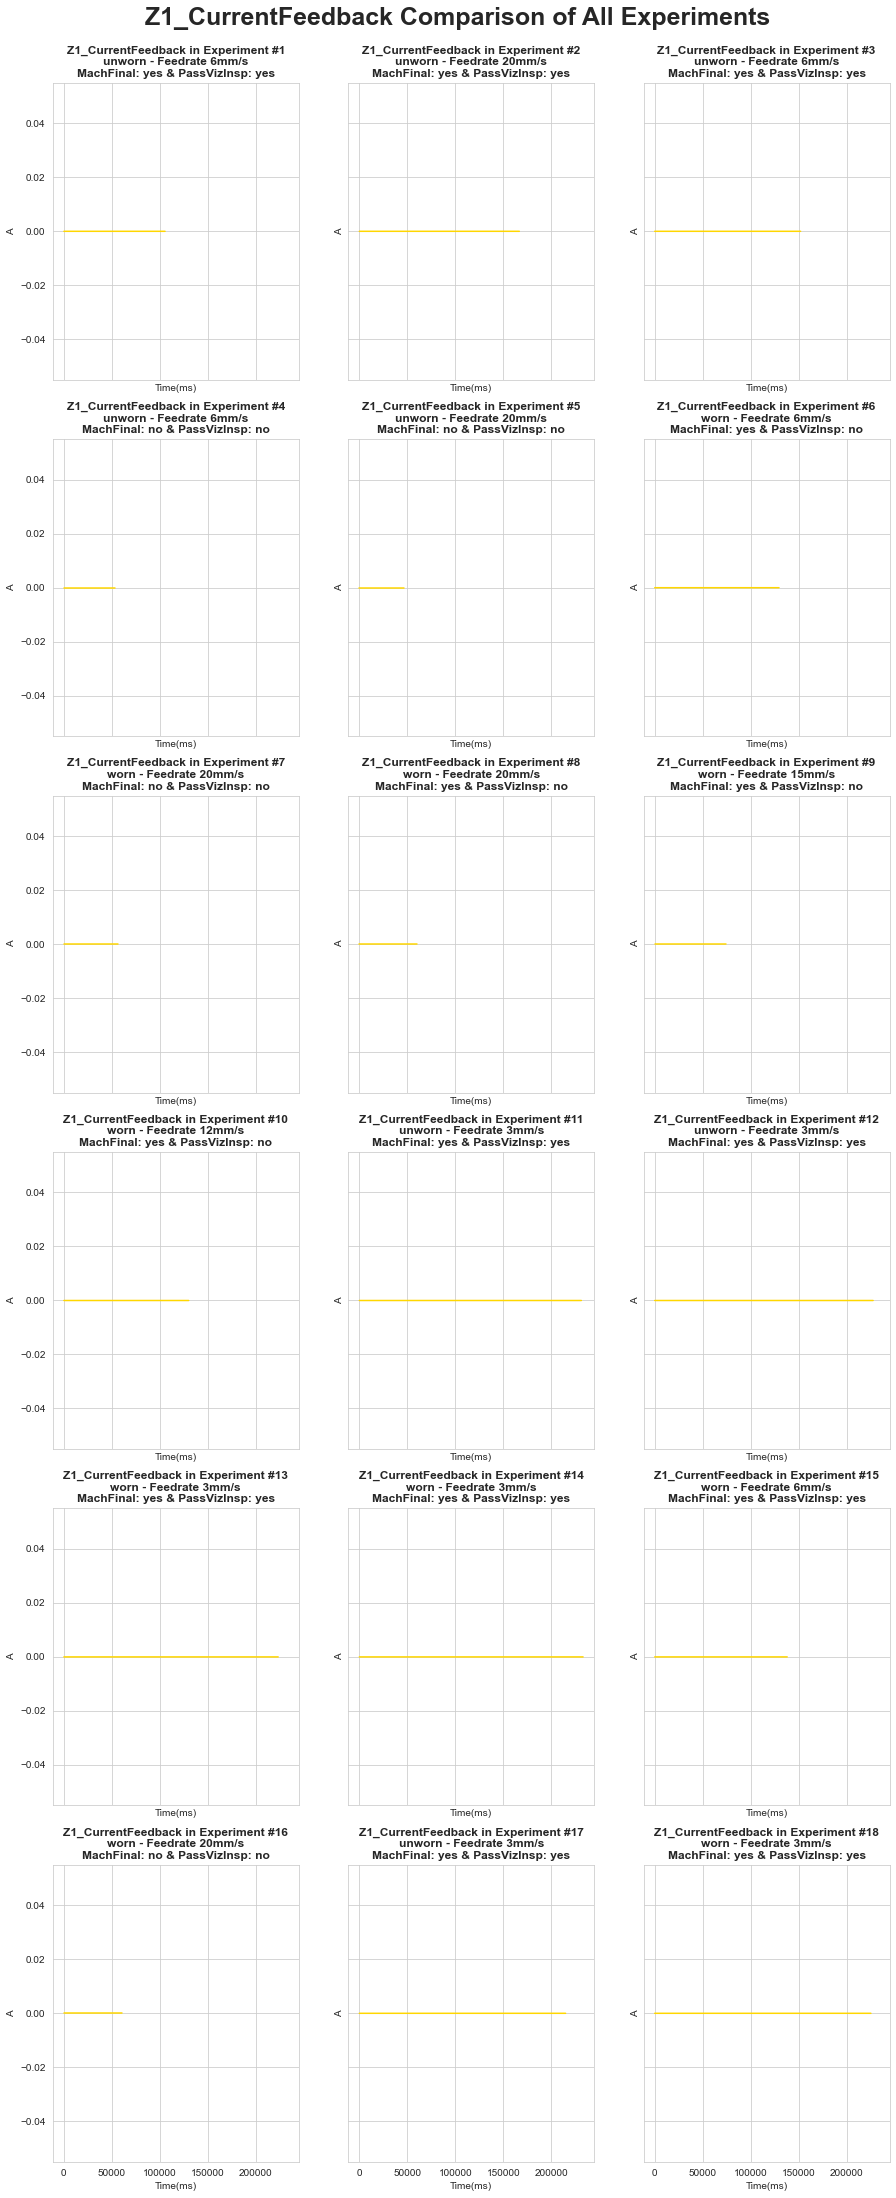

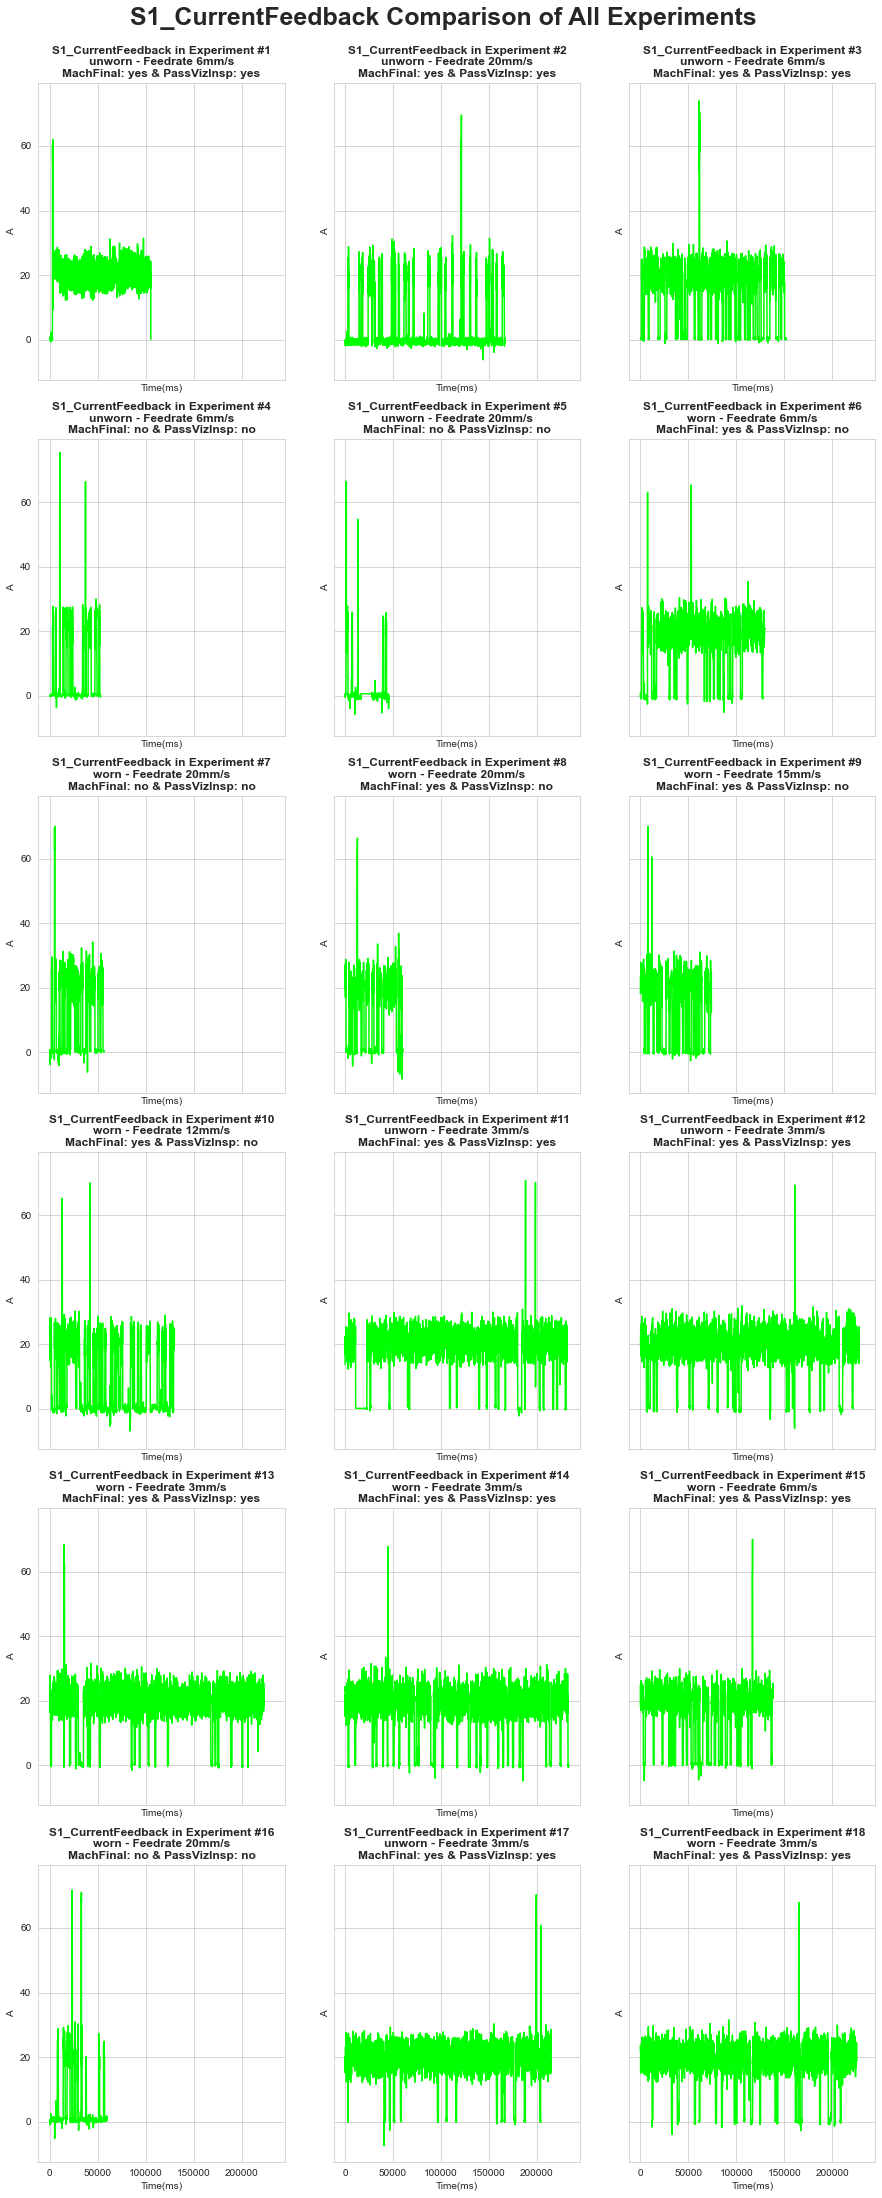

In [103]:
comp_plot('CurrentFeedback','A')

### Output Current 

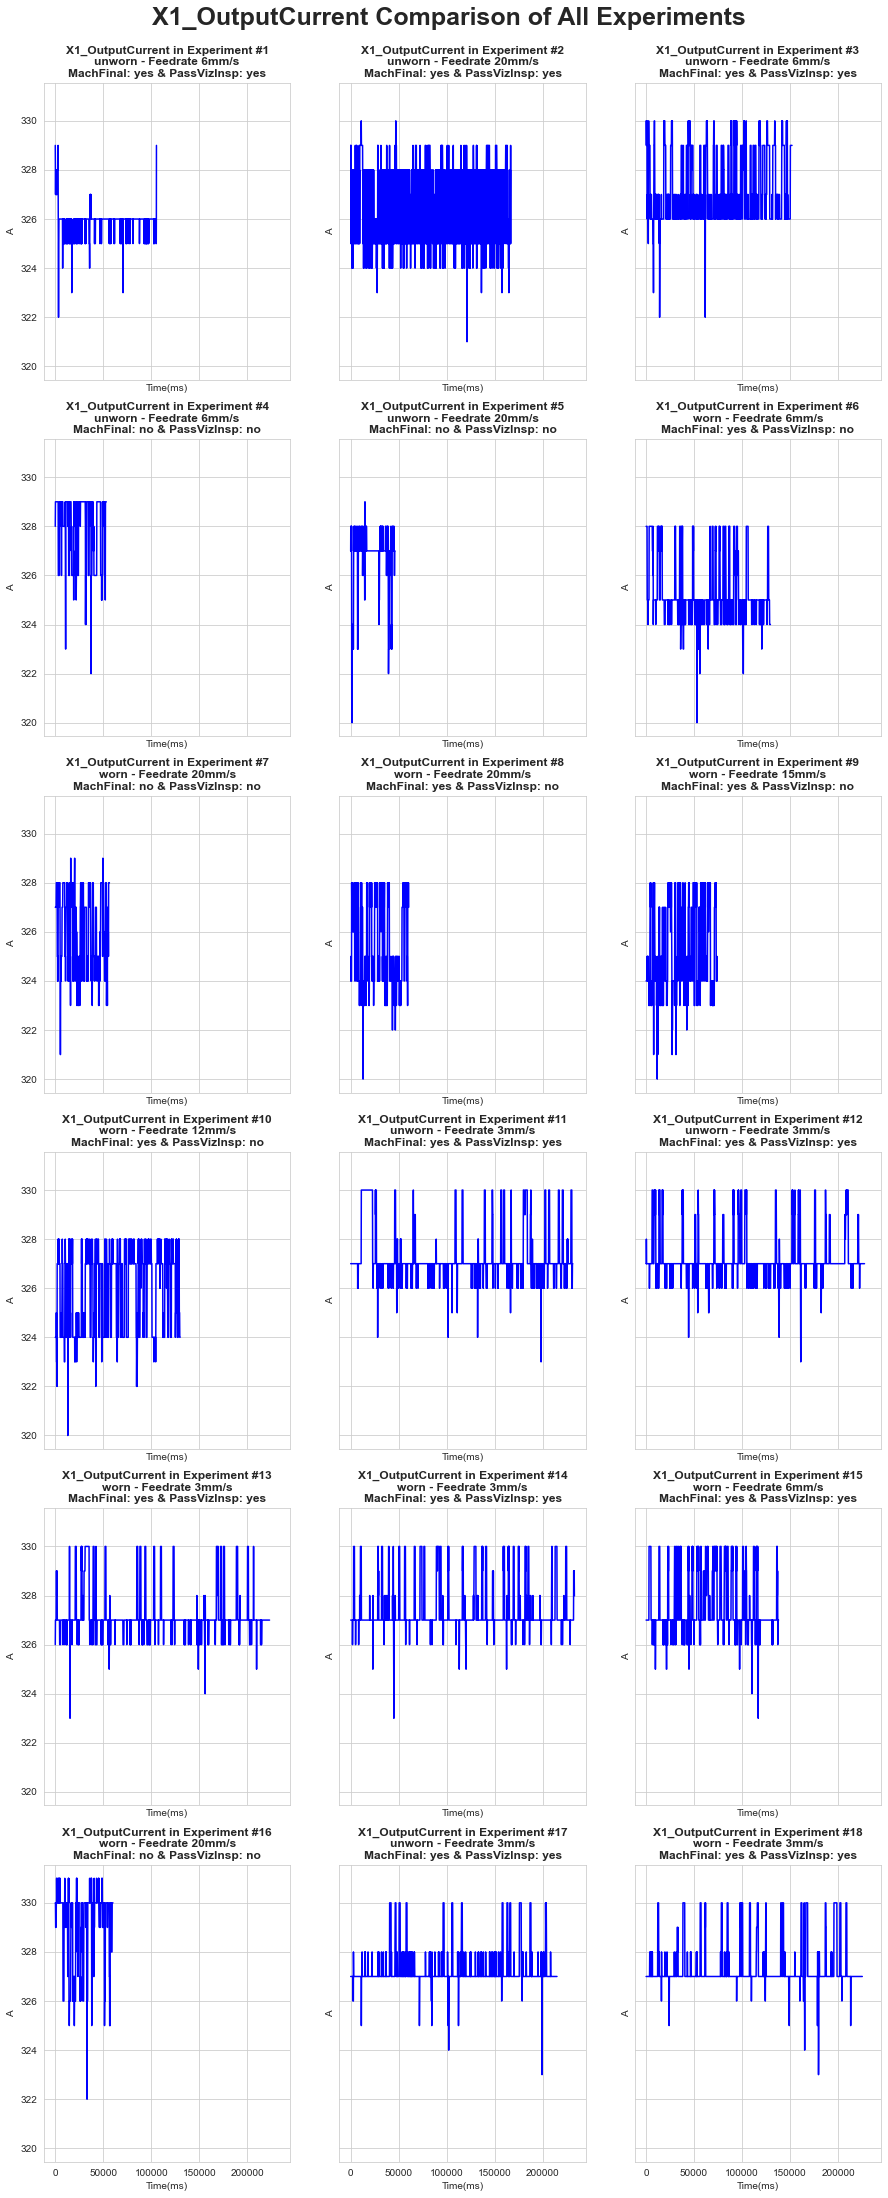

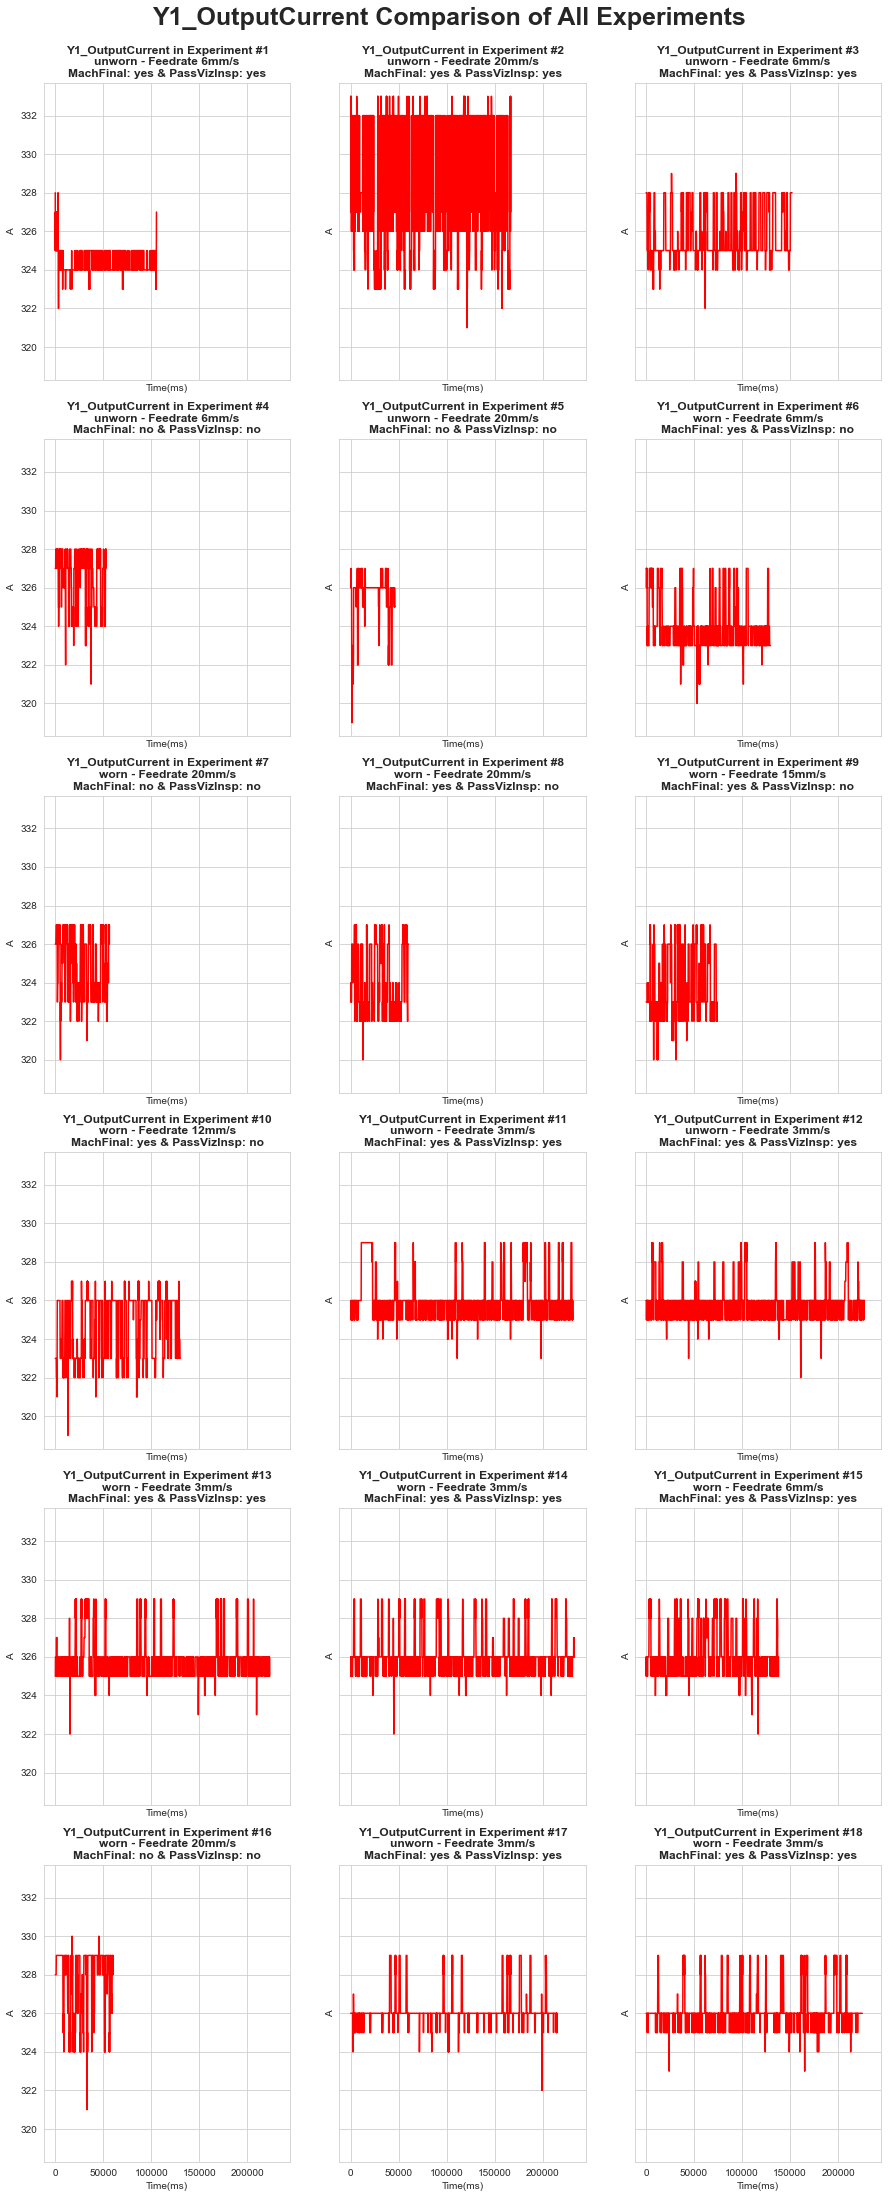

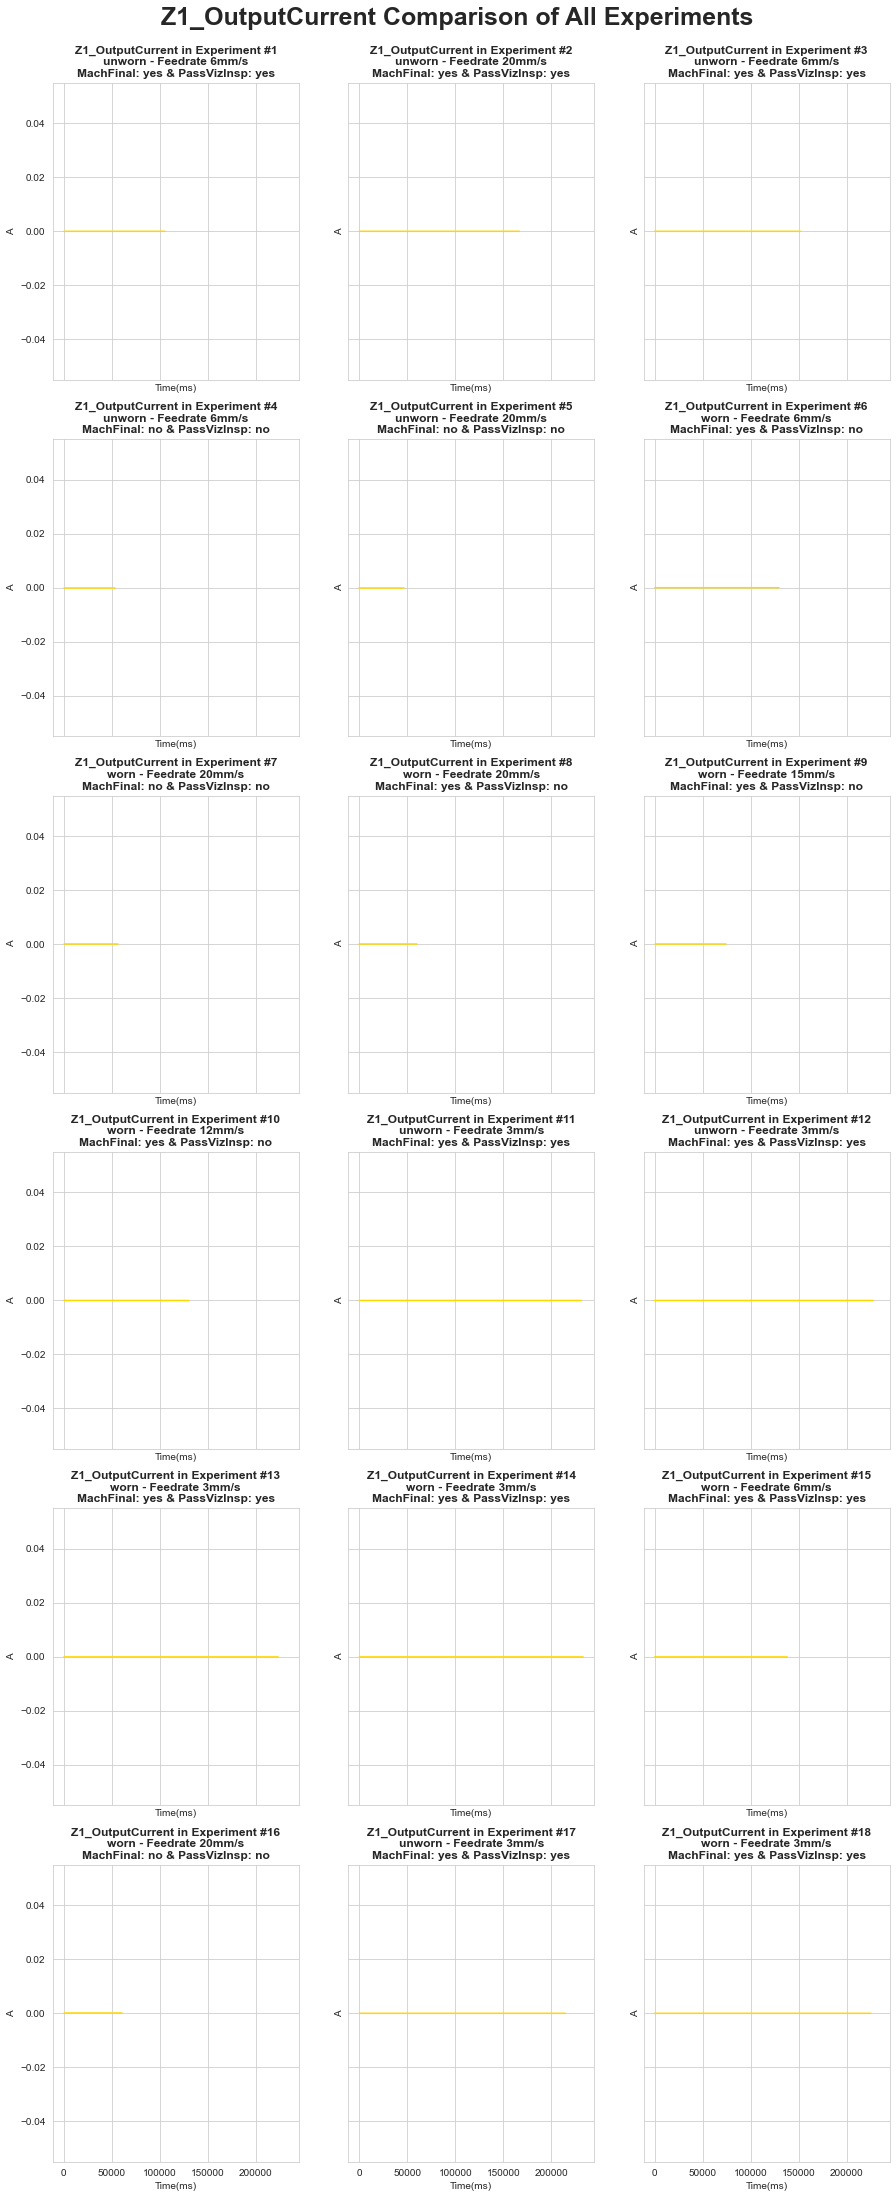

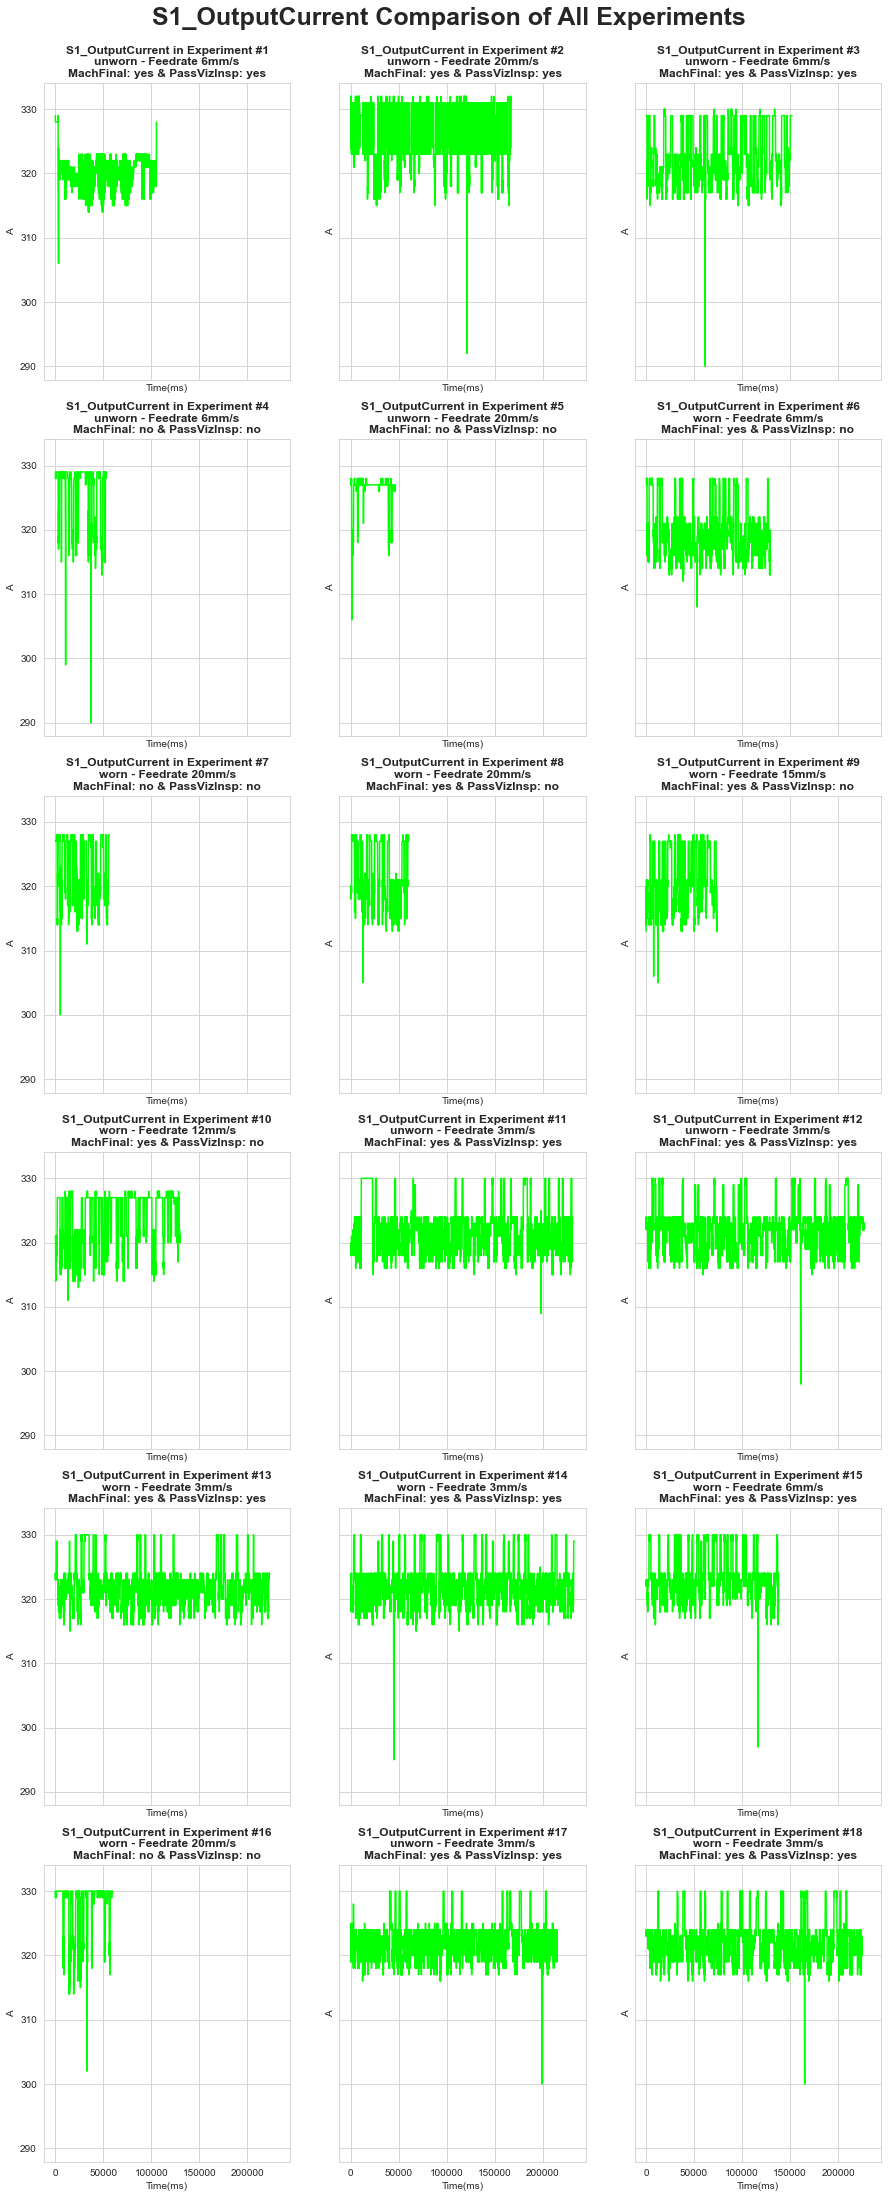

In [104]:
comp_plot('OutputCurrent','A')

## Machine Learning Section

- This section is going to need different ML models with different scenearios
    - S1: All data as is; removing material (material is same in all experiments)
    - S2: Removing M1_CURRENT_PROGRAM_NUMBER variable
    - S3: Removing M1_CURRENT_PROGRAM_NUMBER & M1_CURRENT_FEEDRATE variable
    - S4: Removing M1_CURRENT_PROGRAM_NUMBER & M1_CURRENT_FEEDRATE variable & ActualPosition
    

### Scenario 1